Rodolfo Castro

Xavier de Juan Pulido

Lorenzo Andrés Vigo del Rosso

<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2022 - Homework 01</h1>

<h3 style="color:blue">2022-04-04</h3>

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
***

<h1 style="color:blue">Instructions</h1>

### Submissions: 

By **groups** of _about_ three students (meaning: two is OK, four is not advisable but possible. Individual homeworks 
will also be accepted but collaborative work is preferable). 

Please send me an **email** with the team members names as soon as you have formed it.

Only **one copy** of each group's work must be uploaded (by any member)

### Format: 

A Jupyter or R Markdown **notebook,** with a **header** clearly stating the names of all contributors. 

### Documentation: 

Comments **in code cells** (e.g., meaning of variables, parameters, purpose of functions) are necessary but not sufficient.

You are expected to give full explanations of steps taken in your solution (in **Markdown cells**), as well as discussion of results and their meaning.

Do not drear being too verbose or too elementary.

### External sources

Getting inspiration from any book, document, blog, wep page, even mimicking solutions given in there, is **allowed and encouraged,** provided you give a **proper reference,**
understand every such material, and explain it in you own words, even more exhaustively.

Dare not **copy/paste literally.** I do detect it, believe me, even with a missing source reference. Bleak consequences.

### Deadline:

Completed assignments are due on Tuesday, April 19. They are to be uploaded to the Virtual Campus.

In [1]:
#install.packages("rstan", dependencies=TRUE,repos= "https://cloud.r-project.org")
require(rstan)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [2]:
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

<h1 style="color:blue">01 - Stan version of a conjugate prior problem</h1>

<h2 style="color:blue">Modelling Earthquake Waiting Times</h2>

Consider the problem in `Exponential.02.Earthquake` (notebook in 2022-03-28 folder), where the goal is to study earthquake waiting times.

Likelihood is modelled as an $\expdist(\lambda)$ and $\lambda$ is given a conjugate prior, $\lambda\sim\gammadist(\alpha,\beta)$.

In this notebook some simulations are performed for:

01. Prior pdf for $\lambda$.
02. Prior predictive pdf for the waiting time.
03. Posterior pdf for $\lambda$.
04. Posterior predictive for new waiting time.

In `Exponential.02.Earthquake` we use known theoretical (analytical) descriptions of these distributions.

Your task is to redo these simulations using Stan, disregarding analytical conjugate prior formulas, and then comparing your results to the analytical ones. Use this comparison to tune up adjustable parameters in Stan sampling, such as chain length. 

### 1. Prior pdf for $\lambda$.

$\lambda$ is modelled by a $Gamma(\alpha, \beta)$ distribution. The parameter values are given as $\alpha = 1$ and $\beta = 30$ in the `Exponential.02.Earthquake` notebook. Even if we have to ignore analytical formulas, these parameters are needed to carry out simulations.

In [3]:
prior.a<-1
prior.b<-30

In [4]:
Theor.prior.mean<-prior.a/prior.b
Theor.prior.var<-prior.a/prior.b^2
Theor.prior.sd<-sqrt(Theor.prior.var)
round(Theor.prior.mean,4)
round(Theor.prior.var,4)
round(Theor.prior.sd,4)

[1] 0.0333

[1] 0.0011

[1] 0.0333

### 2. Prior predictive for the waiting time.

We do not need to consider anything else in order to simulate the prior predictive for the waiting time, as it is defined as the exponential of the prior pdf for $\lambda$: $Y_{i} \sim \expdist (\theta)$. Take into account that, in order to generate these simulations, we can not use information on the observations, as we are working with prior functions.


### 3. Posterior pdf for $\lambda$.

Now, let's initialize the vector of observations that will allow us to work with posterior functions.

In [5]:
obs <- c(16, 8, 114, 60, 4, 23, 30, 105)
n <- length(obs)

We model the defined posterior pdf as in the given notebook: Posterior pdf is $\lambda\sim\operatorname{Gamma}(\alpha',\beta')$, with:

$$
    \left\{
    \begin{array}{lcl}
    \alpha'&=&\alpha+n,\\[0.2cm]
    \beta'&=&\beta+n\,\overline{y}.
    \end{array}\right.
$$

We will not use these parameters for simulations, as it would be working with analytical information unnecessarily. In any ways, they will be initialize them now, as they will be needed to plot the analytical functions.

In [6]:
ybar<-mean(obs)
nybar<-sum(obs)

posterior.a<-prior.a+n
posterior.b<-prior.b+nybar

In [7]:
Theor.lambda.post.mean<-posterior.a/posterior.b
Theor.lambda.post.mode<-(posterior.a-1)/posterior.b  # For alpha>1, 0 for alpha=1.
Theor.lambda.post.var<-posterior.a/posterior.b^2
Theor.lambda.post.sd<-sqrt(Theor.lambda.post.var)
round(Theor.lambda.post.mean,4)
round(Theor.lambda.post.mode,4)
round(Theor.lambda.post.var,6)
round(Theor.lambda.post.sd,4)

[1] 0.0231

[1] 0.0205

[1] 5.9e-05

[1] 0.0077

### 4. Posterior pdf for the waiting time.

As it happened with the prior pdf for the waiting time, there is nothing new to define in order to simulate this function.

### Define simulations

In order to perform prior simulations in Stan, we need to define a model that does not take any observations as input. The rest of the model will be identical to the one founds in the ```02.Exponential.01.Claims``` notebook, as the distributions used in both simulations are similar.

The only inputs are the data variables that will receive the values of $\alpha$ and $\beta$. We also define $\theta$, which models $\lambda$. In this case, $\theta$ will work as a simulation of the prior pdf for $\lambda$

$y\_pred$ generates the sampling for the waiting time prediction. As we are not working with observations, $y\_pred$ will be the prior predictive for the waiting time.

In [8]:
modelString <- "
data {
        real<lower=0> prior_a;
        real<lower=0> prior_b;
    }

parameters {
        real<lower=0.00001> theta;
    }

model {
        theta ~ gamma(prior_a,prior_b);
    }

generated quantities {
        real y_pred;
        y_pred = exponential_rng(theta);
    }
    "

Compile the code.

In [9]:
stanDso <- stan_model( model_code=modelString ) 

Define the way parameters will be input into the model and perform sampling for the prior functions. Remember that, in order to simulate the prior functions, we should not be passing any observation to the model.

In [10]:
dat <- list(prior_a=prior.a, prior_b=prior.b); 

In [11]:
fit <- sampling(stanDso, data = dat, iter = 20000, chains=1, warmup = 10000, thin = 1) 


SAMPLING FOR MODEL '63803584987616e4dabe4f943a08d52e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 20000 [  0%]  (Warmup)
Chain 1: Iteration:  2000 / 20000 [ 10%]  (Warmup)
Chain 1: Iteration:  4000 / 20000 [ 20%]  (Warmup)
Chain 1: Iteration:  6000 / 20000 [ 30%]  (Warmup)
Chain 1: Iteration:  8000 / 20000 [ 40%]  (Warmup)
Chain 1: Iteration: 10000 / 20000 [ 50%]  (Warmup)
Chain 1: Iteration: 10001 / 20000 [ 50%]  (Sampling)
Chain 1: Iteration: 12000 / 20000 [ 60%]  (Sampling)
Chain 1: Iteration: 14000 / 20000 [ 70%]  (Sampling)
Chain 1: Iteration: 16000 / 20000 [ 80%]  (Sampling)
Chain 1: Iteration: 18000 / 20000 [ 90%]  (Sampling)
Chain 1: Iteration: 20000 / 20000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.032564 seconds (Warm-up)
Chain 1:                0.0398

Extract the values that model both prior $\lambda$ and the prior predictive for the waiting time.

In [12]:
pr_theta <- extract(fit, 'theta')
pr_theta <- unlist(pr_theta, use.names=FALSE) # prior lambda
pry_pred <- extract(fit, 'y_pred')
pry_pred <- unlist(pry_pred, use.names=FALSE) # prior predictive waiting time

Now, we need to consider a new model that will take observations in order to perform simulations on the posterior pdfs. This model is identical to the one found in ```02.Exponential.01.Claims```. $n$ and $y[n]$ will receive the observations and include them into the simulations to generate posterior distributions.

In [13]:
modelString <- "
data {
        real<lower=0> prior_a;
        real<lower=0> prior_b;

        int<lower=0> n;
        real<lower=0> y[n];
    }

parameters {
        real<lower=0.00001> theta;
    }

model {
        theta ~ gamma(prior_a,prior_b);
        y ~ exponential(theta);
    }

generated quantities {
        real y_pred;
        y_pred = exponential_rng(theta);
    }
    "

As a reminder, the prior parameters are used in these simulations, in an attempt to be as independent from analytical approaches as possible.

In [14]:
dat <- list(n = n, y = obs, prior_a=prior.a, prior_b=prior.b); 

In [15]:
fit <- sampling(stanDso, data = dat, iter = 20000, chains=1, warmup = 10000, thin = 1) 


SAMPLING FOR MODEL '63803584987616e4dabe4f943a08d52e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 20000 [  0%]  (Warmup)
Chain 1: Iteration:  2000 / 20000 [ 10%]  (Warmup)
Chain 1: Iteration:  4000 / 20000 [ 20%]  (Warmup)
Chain 1: Iteration:  6000 / 20000 [ 30%]  (Warmup)
Chain 1: Iteration:  8000 / 20000 [ 40%]  (Warmup)
Chain 1: Iteration: 10000 / 20000 [ 50%]  (Warmup)
Chain 1: Iteration: 10001 / 20000 [ 50%]  (Sampling)
Chain 1: Iteration: 12000 / 20000 [ 60%]  (Sampling)
Chain 1: Iteration: 14000 / 20000 [ 70%]  (Sampling)
Chain 1: Iteration: 16000 / 20000 [ 80%]  (Sampling)
Chain 1: Iteration: 18000 / 20000 [ 90%]  (Sampling)
Chain 1: Iteration: 20000 / 20000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.032413 seconds (Warm-up)
Chain 1:                0.0349

Perform the extractions:

In [16]:
pos_theta <- extract(fit, 'theta')
pos_theta <- unlist(pos_theta, use.names=FALSE) # posterior lambda
posy_pred <- extract(fit, 'y_pred')
posy_pred <- unlist(posy_pred, use.names=FALSE) # posterior predictive expecting time

### Plotting and comparing to analytical approaches

As specified in the ```03.Exponential.02.Earthquake``` notebook, the predictive distribution is a Pareto II (Lomax). For this reason, we will need to import actuar in order to plot the analytical predictive distributions.

In [17]:
#install.packages("actuar", dependencies=TRUE,repos= "https://cloud.r-project.org")
require(actuar)

Loading required package: actuar


Attaching package: ‘actuar’


The following objects are masked from ‘package:stats’:

    sd, var


The following object is masked from ‘package:grDevices’:

    cm




In the case of prior functions:

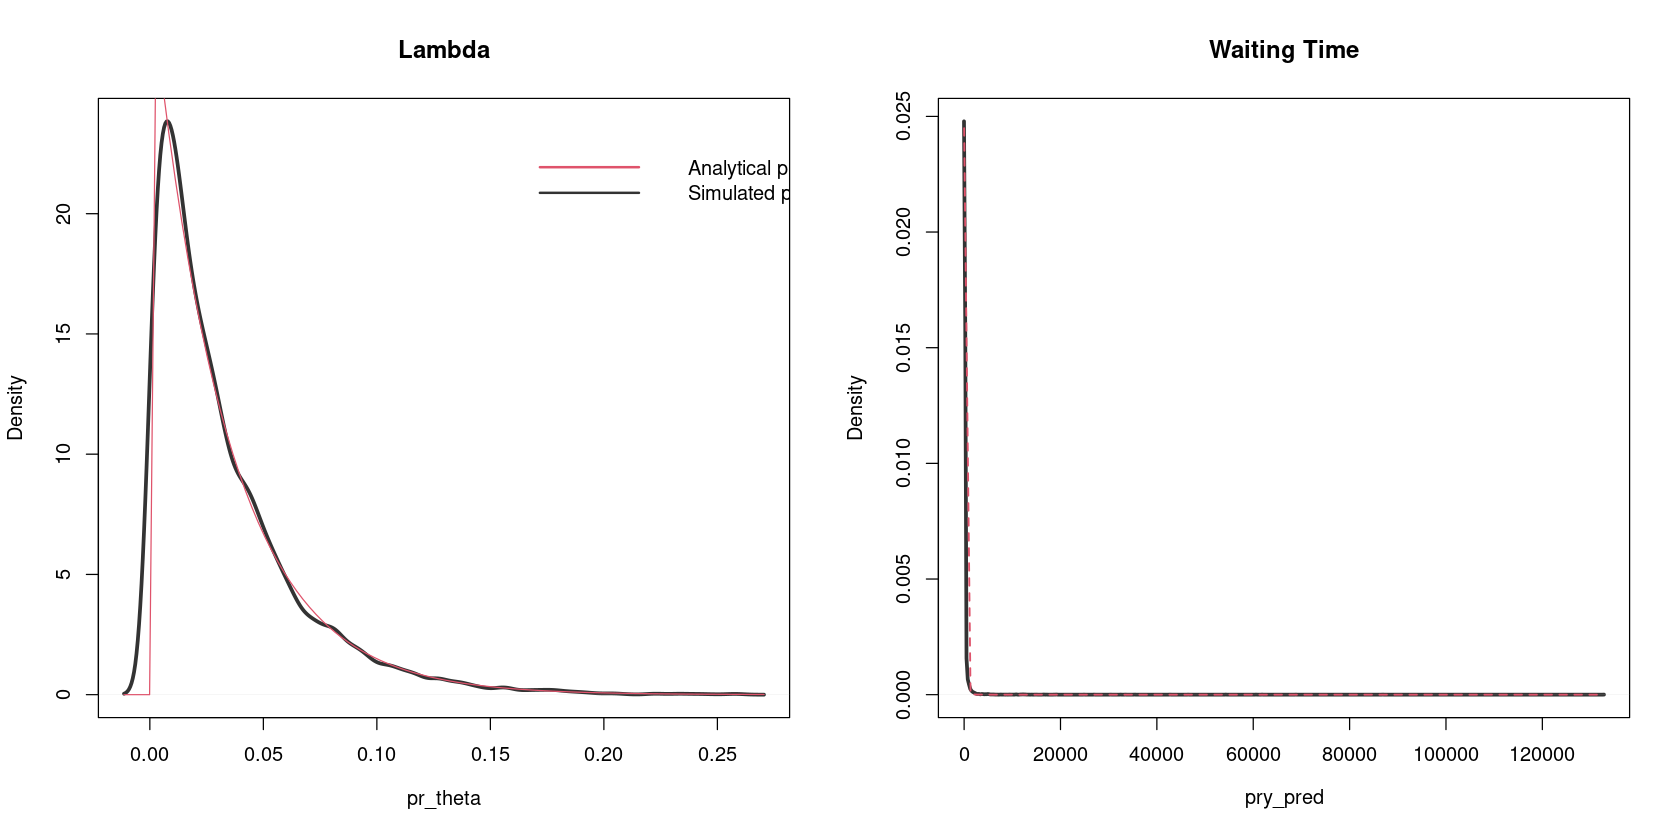

In [18]:
options(repr.plot.width=14,repr.plot.height=7)
old.par<- par(mfrow=c(1,2))

# Simulated prior parameter
plot(density(pr_theta),
     xlab=expression(pr_theta), col=grey(0, 0.8),lwd=3,
     main="Lambda")
# Analytical prior parameter
curve(dgamma(x, prior.a, prior.b), 
      add=TRUE, col=2)
legend(x=0.15,y=23,legend=c("Analytical prior", "Simulated prior"), 
           col=c(2, grey(0, 0.8)), lty=c(1,1), bty="n",lwd=2)
# Simulated prior predictive
plot(density(pry_pred),
     xlab=expression(pry_pred), col=grey(0, 0.8),lwd=3,
     main="Waiting Time")
# Analytical prior predictive
curve(dpareto(x, prior.a, prior.b), 
      add=TRUE, col=2, lwd=1.5, lty=2,5)
legend(x=70000,y=0.030,legend=c("Analytical prior predictive", "Simulated prior predictive"), 
           col=c(2, grey(0, 0.8)), lty=c(2,1), bty="n",lwd=3)
par(old.par)
# PLOT

Simulations seem to be similar to the analytical approach. Sadly, we could not achieve cropping the x axis of the second plot to visualize it better, so this analysis may be inaccurate.

And now, the posterior distributions:

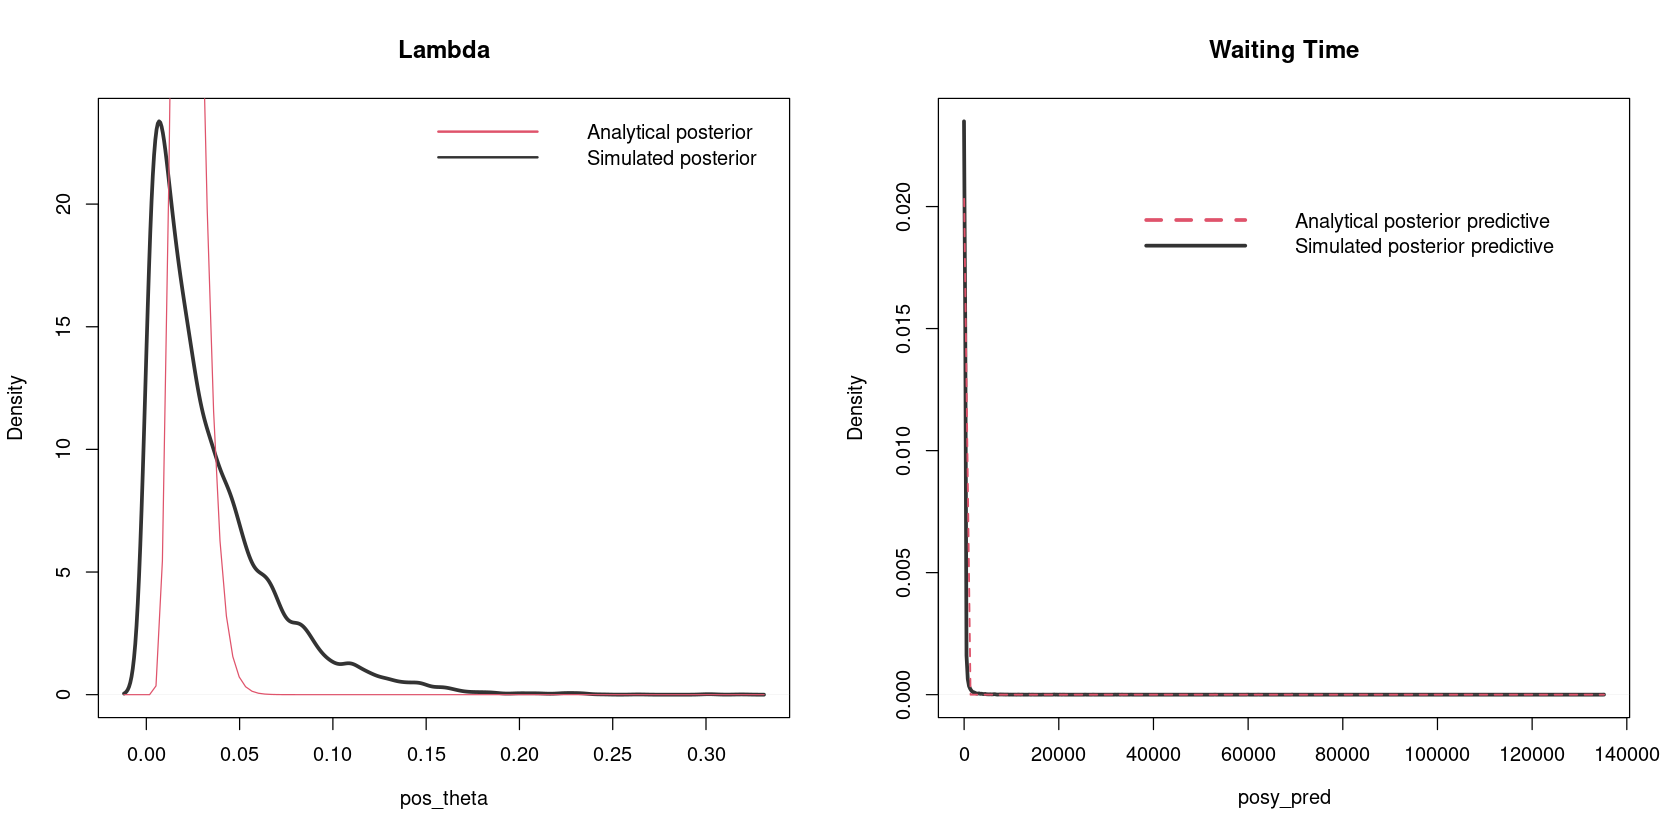

In [19]:
options(repr.plot.width=14,repr.plot.height=7)
old.par<- par(mfrow=c(1,2))

# Simulated prior parameter
plot(density(pos_theta),
     xlab=expression(pos_theta), col=grey(0, 0.8),lwd=3,
     main="Lambda")
# Analytical prior parameter
curve(dgamma(x, posterior.a, posterior.b), 
      add=TRUE, col=2)
legend(x=0.13,y=24,legend=c("Analytical posterior", "Simulated posterior"), 
           col=c(2, grey(0, 0.8)), lty=c(1,1), bty="n",lwd=2)
# Simulated prior predictive
plot(density(posy_pred),
     xlab=expression(posy_pred), col=grey(0, 0.8),lwd=3,
     main="Waiting Time")
# Analytical prior predictive
curve(dpareto(x, posterior.a, posterior.b), 
      add=TRUE, col=2, lwd=1.5, lty=2,5)
legend(x=28000,y=0.0205,legend=c("Analytical posterior predictive", "Simulated posterior predictive"), 
           col=c(2, grey(0, 0.8)), lty=c(2,1), bty="n",lwd=3)
par(old.par)
# PLOT

This experiment could be improved, in fact, stan warned us about some divergencies. Let's check how changing some parameters impacts on the results.

Warning message:
“There were 19 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


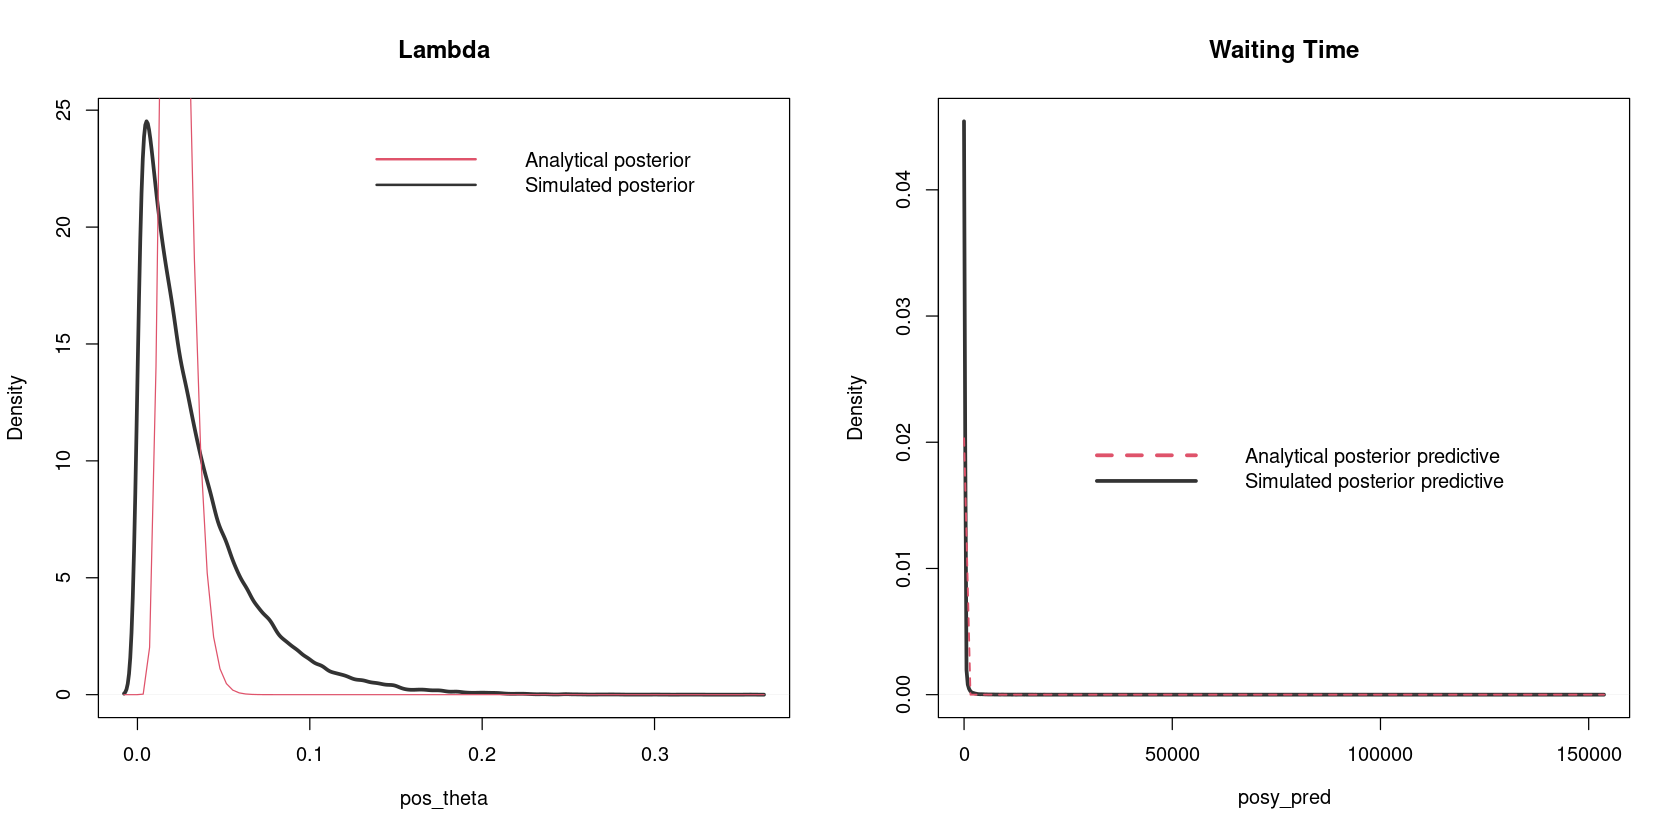

In [20]:
fit <- sampling(stanDso, data = dat, iter = 20000, chains=5, warmup = 5000, thin = 1) 
pos_theta <- extract(fit, 'theta')
pos_theta <- unlist(pos_theta, use.names=FALSE) # posterior lambda
posy_pred <- extract(fit, 'y_pred')
posy_pred <- unlist(posy_pred, use.names=FALSE) # posterior predictive expecting time
options(repr.plot.width=14,repr.plot.height=7)
old.par<- par(mfrow=c(1,2))

# Simulated prior parameter
plot(density(pos_theta),
     xlab=expression(pos_theta), col=grey(0, 0.8),lwd=3,
     main="Lambda")
# Analytical prior parameter
curve(dgamma(x, posterior.a, posterior.b), 
      add=TRUE, col=2)
legend(x=0.11,y=24,legend=c("Analytical posterior", "Simulated posterior"), 
           col=c(2, grey(0, 0.8)), lty=c(1,1), bty="n",lwd=2)
# Simulated prior predictive
plot(density(posy_pred),
     xlab=expression(posy_pred), col=grey(0, 0.8),lwd=3,
     main="Waiting Time")
# Analytical prior predictive
curve(dpareto(x, posterior.a, posterior.b), 
      add=TRUE, col=2, lwd=1.5, lty=2,5)
legend(x=20000,y=0.021,legend=c("Analytical posterior predictive", "Simulated posterior predictive"), 
           col=c(2, grey(0, 0.8)), lty=c(2,1), bty="n",lwd=3)
par(old.par)
# PLOT

We have identified an interesting tradeoff, where more chains (up to 5, as more would kill our kernels) and less warmup allows the simulated posterior lambda to reach 'higher', closer to the analytical posterior. However, the simulated posterior predictive also reaches higher in density values, but distancing itself from the analytical one.

The risk of divergencies decreases alongside the warmup parameter.

<h1 style="color:blue">02 - A more elaborate mixture prior for the spinning coin</h1>

(continued from Diaconis experiment)

On reflection, it was decided that tails had come up more often than heads in the past; further some coins seemed likely to be symmetric. 

Thus, a final approximation to the prior was taken as:

$$
   0.50\cdot\betadist(10,20) + 0.20\cdot\betadist(15,15) + 0.30\cdot\betadist(20,10).
$$

Same observed data as in the previous model.

In [31]:
# Number of trials
n<-10
# Observed x
x.obs<-3

Perform a complete Bayesian analysis of this model, in close parallel to the first example.

(1) Using the theoretical formulas (prior predictive pmf, posterior pdf, posterior predictive pmf)

(2) Using independent random numbers (`rbeta()` functions, etc.)

(3) JAGS version

(4)$ {}^{\star}$ Stan version. 

>$ (\star)$ Hint: this one **is difficult** due to intrinsic limitations in Stan. There are several known workarounds; you can try to find one but do not despair if you fail to develop a workable version.

>As a matter of fact even a Stan version of the two-components prior mixture in `Mixture.priors.02.ipynb` 
is rather tricky: Stan does not allow integer parameters thus the JAGS code cannot be translated literally.

# The model

The model faced consists in a mixture of three Beta distributions becoming a Beta-Bernoulli model.

The objective is to learn that distribution from an independent sequence of experiments, so it can be modelled as a Binomial distribution of size `n` with probability defined by the Beta-Bernoulli distribution.

The likelihood is:
$$ x \sim \binomdist(\text{size}=n,\text{prob}=\theta)$$

with the prior distribution
$$ \theta \sim 0.50\cdot\betadist(10,20) + 0.20\cdot\betadist(15,15) + 0.30\cdot\betadist(20,10) $$


In [4]:
# Let's define the parameters of the mixture prior
prior.alpha1<-10
prior.beta1<-20
prior.alpha2<-15
prior.beta2<-15
prior.alpha3<-20
prior.beta3<-10
prior.gamma1<-0.5
prior.gamma2<-0.2
prior.gamma3<-0.3

# Define two functions to compute the pdf and cdf of that betas
mixture.prior.pdf<-function(theta){
    return(prior.gamma1*dbeta(theta,prior.alpha1,prior.beta1)+prior.gamma2*dbeta(theta,prior.alpha2,prior.beta2)+prior.gamma3*dbeta(theta,prior.alpha3,prior.beta3))
}
mixture.prior.cdf<-function(theta){
    return(prior.gamma1*pbeta(theta,prior.alpha1,prior.beta1)+prior.gamma2*pbeta(theta,prior.alpha2,prior.beta2)+prior.gamma3*pbeta(theta,prior.alpha3,prior.beta3))
}

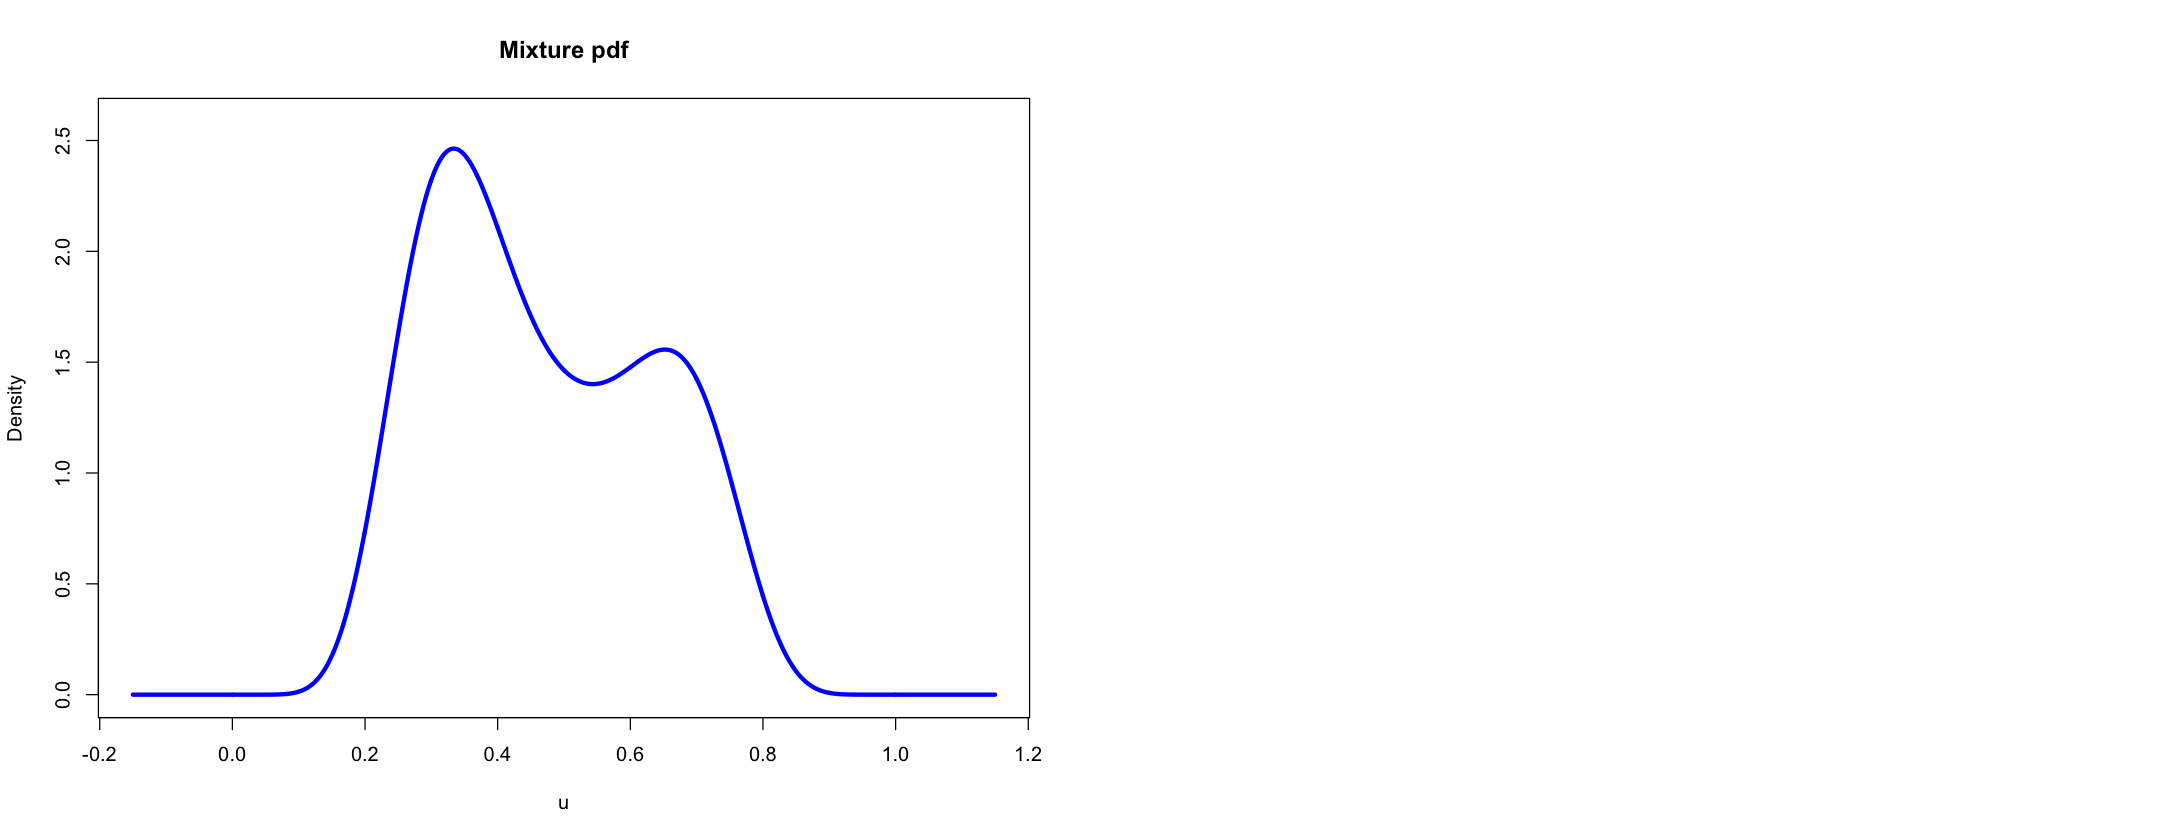

In [5]:
# And plot the Mixture pdf
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
u<-seq(0,1,length=1000)
v<-mixture.prior.pdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Mixture pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

# Bayesian Analysis of the model

## (1) Using the theoretical formulas

Given the approximation of the prior from the example, we can define our prior pdf as:
$$ h(\theta) = \gamma_1h_1(\theta)+\gamma_2h_2(\theta)+\gamma_3h_3(\theta) $$

And the likelihood given by the binomial as:
$$ f(x\mid \theta)= {{n}\choose{x}} \theta^{x}(1-\theta)^{n-x}, \;\;\; x=0,1,\ldots,n $$

Then, the joint pdf is:
$$ f(x,\theta) = \gamma_1f_1(x,\theta) + \gamma_2f_2(x,\theta) + \gamma_3f_3(x,\theta) $$
where:
$$ f_i(x,\theta) = f(x|\theta)\cdot h_i(\theta), \;\;\; i=1,2,3 $$

Integrating out $\theta$, the marginal for $x$:
$$ f(x) = \gamma_1f_1(x) + \gamma_2f_2(x) + \gamma_3f_3(x) $$
where:
$$ f_i(x)=\int f(x|\theta)\cdot h_i(\theta)d\theta, \;\;\; i = 1,2,3 $$

Thus, the prior predictive pdf is a mixture of three _partial prior predictive pdf's,_ with the same coefficients, $ \gamma_1, \gamma_2 \;\text{and}\; \gamma_3$, as the prior.

Now, to compute the *theoretical posterior pdf* we will use the Bayes' formula:

$$ h(\theta|x) = \frac{f(x,\theta)}{f(x)} = \frac{\gamma_1f_1(x,\theta) + \gamma_2f_2(x,\theta) + \gamma_3f_3(x,\theta)}{\gamma_1f_1(x) + \gamma_2f_2(x) + \gamma_3f_3(x)} $$

And using the obvious notation:
$$ h_{i}(\theta|x)=\frac{f_i(x,\theta)}{f_i(x)}\;\;\; i=1,2,3 $$

The posterior pdf is:
$$ h(\theta|x) = \hat{\gamma_1}(x)h_1(\theta|x)+\hat{\gamma_2}(x)h_2(\theta|x)+\hat{\gamma_3}(x)h_3(\theta|x) $$
where $ \hat{\gamma_i}(x) = k\gamma_i f_i(x)$ and weighted so that the three constants keep adding to 1.

Then, it's enough to obtain $f_i(x)$.

$$h_i(\theta,\alpha,\beta)=\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

$$f_i(x)=\int f(x\mid \theta)h_i(\theta)d\theta=
\int_0^1 \left({{n}\choose{x}} \theta^{x}(1-\theta)^{n-x}\right)
\left(\frac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}\right)d\theta=
$$
$$
={{n}\choose{x}}\frac{1}{B(\alpha,\beta)}\int_0^1 \theta^{\alpha+x-1}(1-\theta)^{\beta+n-x-1}d\theta=
{{n}\choose{x}}\frac{B(\alpha+x,\beta+n-x)}{B(\alpha,\beta)}\int_0^1 h_i(\theta,\alpha+x,\beta+n-x)d\theta=
{{n}\choose{x}}\frac{B(\alpha+x,\beta+n-x)}{B(\alpha,\beta)}
$$

And finally,

$$
h_i(\theta \mid x)=\dfrac{f_i(x,\theta)}{f_i(x)}=\frac{B(\alpha,\beta)}{{{n}\choose{x}}B(\alpha+x,\beta+n-x)}
\frac{{{n}\choose{x}}}{B(\alpha,\beta)}\theta^{\alpha+x-1}(1-\theta)^{\beta+n-x-1}=h_i(\theta,\alpha+x,\beta+n-x)
$$

In [47]:
# Let's create the posterior functions
# First set the new alphas and betas
posterior.alpha1<-prior.alpha1+x.obs
posterior.beta1<-prior.beta1+n-x.obs
posterior.alpha2<-prior.alpha2+x.obs
posterior.beta2<-prior.beta2+n-x.obs
posterior.alpha3<-prior.alpha3+x.obs
posterior.beta3<-prior.beta3+n-x.obs

# Compute the marginals for the given observation
f1<-choose(n,x.obs)*beta(posterior.alpha1,posterior.beta1)/beta(prior.alpha1,prior.beta1)
f2<-choose(n,x.obs)*beta(posterior.alpha2,posterior.beta2)/beta(prior.alpha2,prior.beta2)
f3<-choose(n,x.obs)*beta(posterior.alpha3,posterior.beta3)/beta(prior.alpha3,prior.beta3)

# Set the new gammas normalizing them
posterior.gamma1<-prior.gamma1*f1
posterior.gamma2<-prior.gamma2*f2
posterior.gamma3<-prior.gamma3*f3
sum<-posterior.gamma1+posterior.gamma2+posterior.gamma3
posterior.gamma1<-posterior.gamma1/sum
posterior.gamma2<-posterior.gamma2/sum
posterior.gamma3<-posterior.gamma3/sum

# Create the pdf and cdf functions for the new mixture
mixture.posterior.pdf<-function(theta){
    return(posterior.gamma1*dbeta(theta,posterior.alpha1,posterior.beta1)+posterior.gamma2*dbeta(theta,posterior.alpha2,posterior.beta2)+posterior.gamma3*dbeta(theta,posterior.alpha3,posterior.beta3))
}

mixture.posterior.cdf<-function(theta){
    return(posterior.gamma1*pbeta(theta,posterior.alpha1,posterior.beta1)+posterior.gamma2*pbeta(theta,posterior.alpha2,posterior.beta2)+posterior.gamma3*pbeta(theta,posterior.alpha3,posterior.beta3))
}

And now we can plot the theoretical posterior pdf:

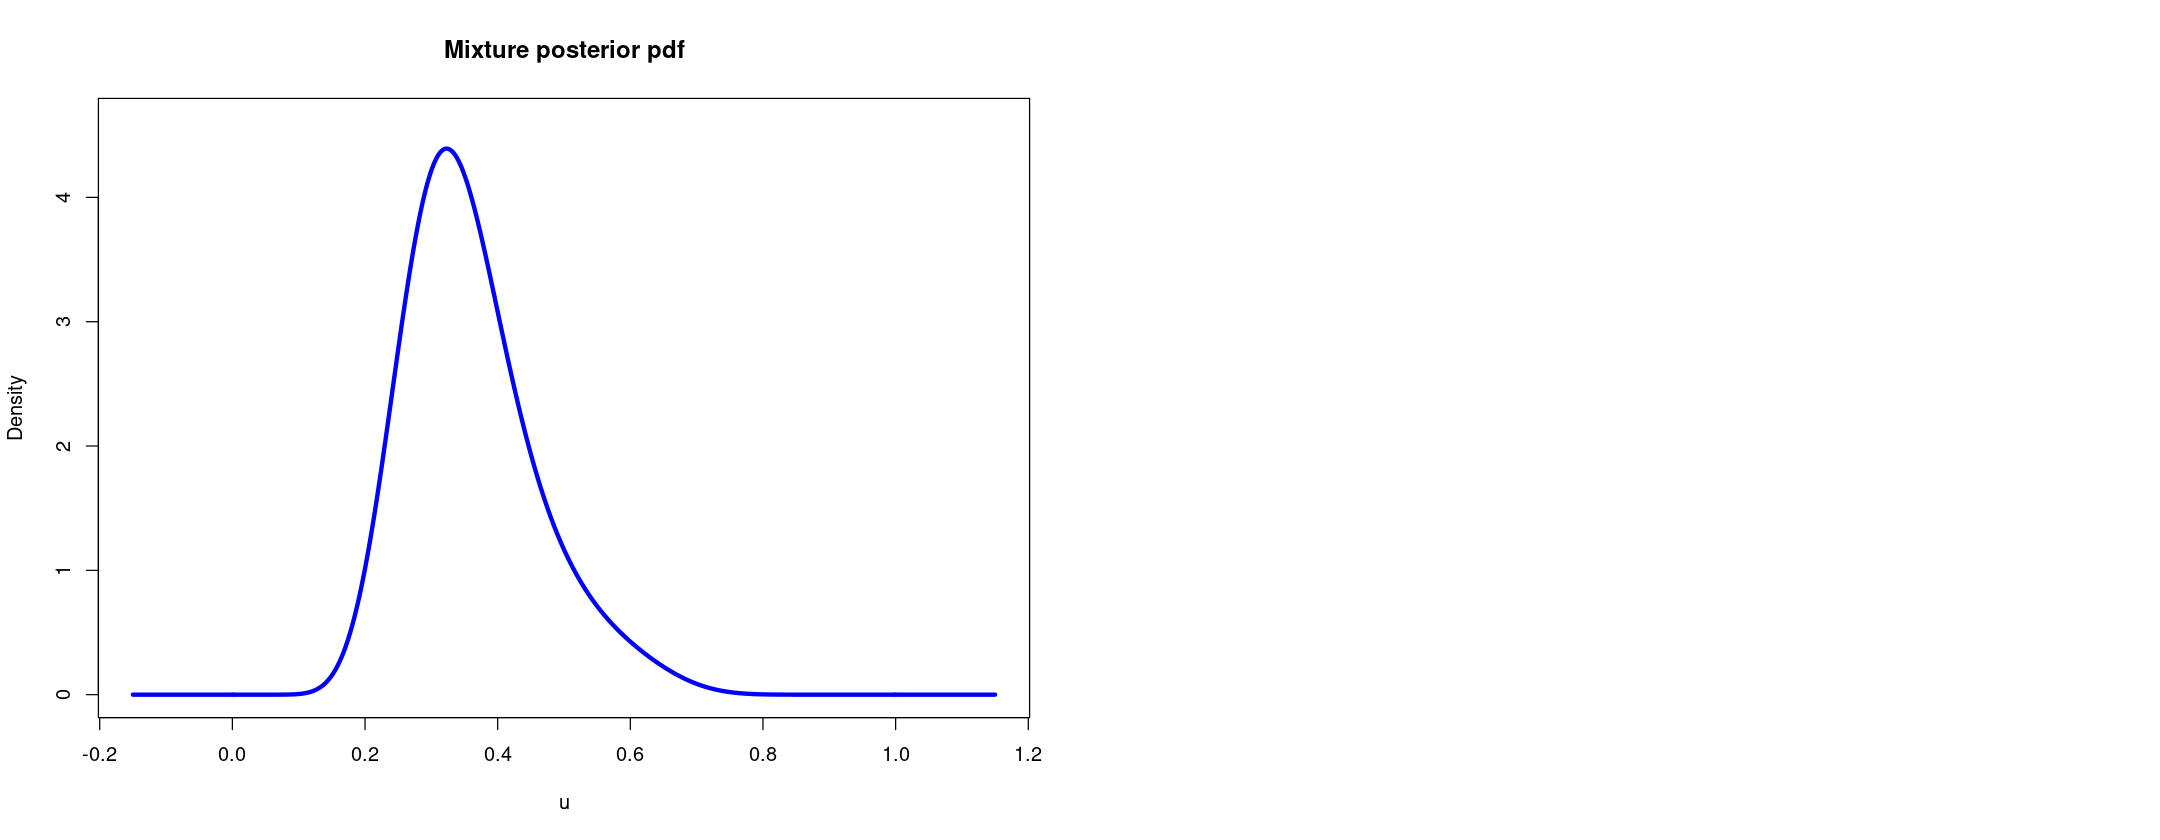

In [49]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
u<-seq(0,1,length=1000)
v<-mixture.posterior.pdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Mixture posterior pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

With these formulas, we can make the **theoretical analysis of posterior quantities**.

### MAP estimator of $\theta$

The maximum of a mixture distribution cannot be computed directly. For this reason, we will look for the maximum value of the posterior pdf.

[1] "Theoretical MAP: 0.323"


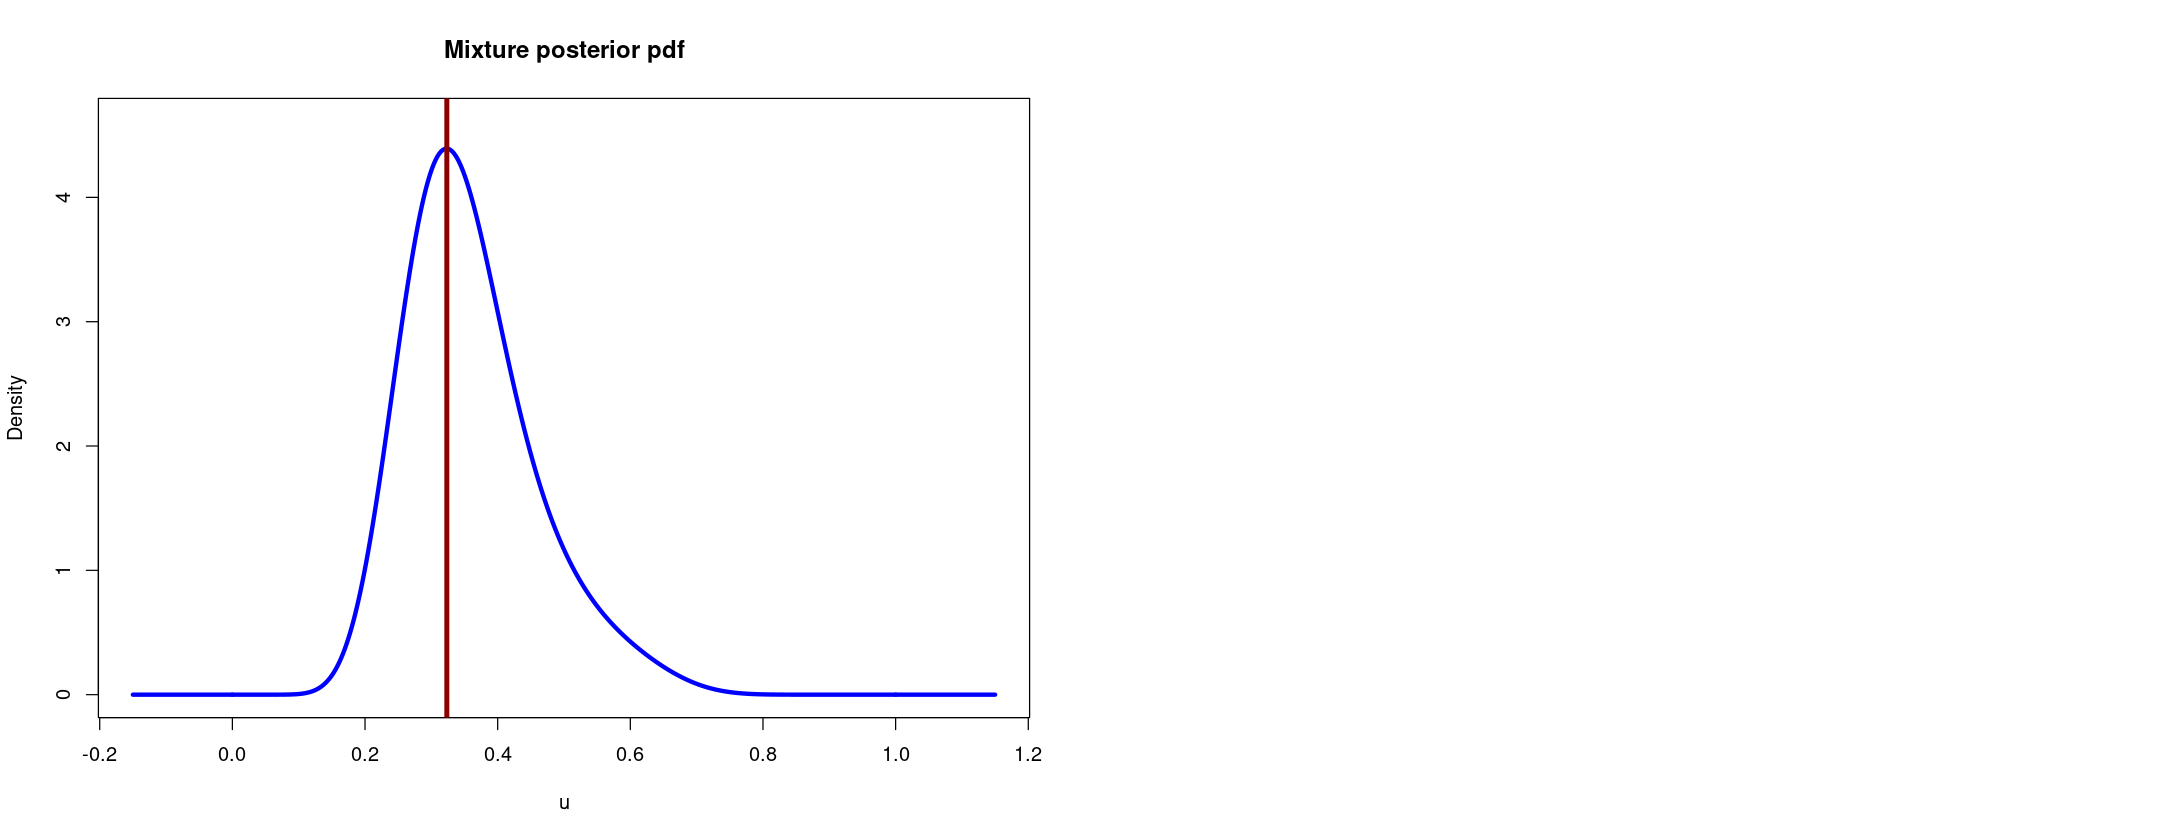

In [58]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
u<-seq(0,1,length=1000)
v<-mixture.posterior.pdf(u)

Theor.MAP<-u[which.max(v)]

plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Mixture posterior pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

abline(v=Theor.MAP,col="DarkRed",lwd=4)

print(paste0("Theoretical MAP: ", round(Theor.MAP,3)))

### Posterior expectation

We know the expectation for a generic $Z \sim Beta(\alpha,\beta)$ distribution is $\frac{\alpha}{\alpha+\beta}$

In our case, $Z \sim \gamma_1 Beta(\alpha_1,\beta_1) + \gamma_2 Beta(\alpha_2,\beta_2) + \gamma_3 Beta(\alpha_3,\beta_3)$

Then,
$$ E(Z) = \int \theta (\gamma_1 Beta(\alpha_1,\beta_1) + \gamma_2 Beta(\alpha_2,\beta_2) + \gamma_3 Beta(\alpha_3,\beta_3))d\theta = \sum_{i=1}^{3} \gamma_i \int \theta Beta(\alpha_i,\beta_i)d\theta = \sum_{i=1}^{3} \gamma_i E(Beta(\alpha_i,\beta_i)) $$

In [59]:
# Theoretical Expectation
Theor.Posterior.Expectation1<-(posterior.alpha1)/(posterior.alpha1+posterior.beta1)
Theor.Posterior.Expectation2<-(posterior.alpha2)/(posterior.alpha2+posterior.beta2)
Theor.Posterior.Expectation3<-(posterior.alpha3)/(posterior.alpha3+posterior.beta3)
Theor.Posterior.Expectation<-posterior.gamma1*Theor.Posterior.Expectation1+
    posterior.gamma2*Theor.Posterior.Expectation2+
    posterior.gamma3*Theor.Posterior.Expectation3

print(paste0("Theoretical Posterior expectation: ",round(Theor.Posterior.Expectation,3)))

[1] "Theoretical Posterior expectation: 0.36"


### Posterior Variance

Again, we know that the variance for a generic $Z\sim Beta(\alpha,\beta)$ is $\text{var}(Z) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

But, in our case, $Z\sim \gamma_1 Beta(\alpha_1,\beta_1) + \gamma_2 Beta(\alpha_2,\beta_2) + \gamma_3 Beta(\alpha_3,\beta_3)$

So, setting $\theta^*$ as the expectation of $Z$ and $\theta_i^*,\;i=1,2,3$ the expectations of each $Beta(\alpha_i,\beta_i),\;i=1,2,3$ respectively we have:

$$ \text{var}(Z) = \int(\theta-\theta^*)\sum_{i=1}^{3} \gamma_i Beta(\alpha_i,\beta_i)d\theta = \int\sum_{i=1}^{3}(\theta-\theta^*+\theta_i^*-\theta_i^*)\gamma_i Beta(\alpha_i,\beta_i)d\theta = \int\sum_{i=1}^{3}((\theta-\theta_i^*)^2+(\theta_i^*-\theta^*)^2+2(\theta-\theta_i^*)(\theta_i^*-\theta^*))\gamma_i Beta(\alpha_i,\beta_i)d\theta = \sum_{i=1}^{3} \gamma_i \int (\theta-\theta_i^*)^2 Beta(\alpha_i,\beta_i)d\theta + \sum_{i=1}^{3} \gamma_i(\theta_i^* - \theta^*)^2 \int Beta(\alpha_i,\beta_i)d\theta + 2\sum_{i=1}^{3}\gamma_i(\theta_i^* - \theta^*) \int (\theta-\theta_i^*)Beta(\alpha_i,\beta_i)d\theta = \sum_{i=1}^{3}\gamma_i \text{var}(Beta(\alpha_i,\beta_i)) + \sum_{i=1}^{3}\gamma_i (\theta_i^*-\theta^*)^2 + 2 \sum_{i=1}^{3}\gamma_i (\theta_i^*-\theta^*)(E(Beta(\alpha_i,\beta_i))-\theta_i^*) = \sum_{i=1}^{3}\gamma_i \text{var}(Beta(\alpha_i,\beta_i)) + \sum_{i=1}^{3}\gamma_i (\theta_i^*-\theta^*) $$

In [61]:
# Theoretical Posterior Variance
Theor.Posterior.Variance1<-(posterior.alpha1*posterior.beta1)/((posterior.alpha1+posterior.beta1)^2*(posterior.alpha1+posterior.beta1+1))
Theor.Posterior.Variance2<-(posterior.alpha2*posterior.beta2)/((posterior.alpha2+posterior.beta2)^2*(posterior.alpha2+posterior.beta2+1))
Theor.Posterior.Variance3<-(posterior.alpha3*posterior.beta3)/((posterior.alpha3+posterior.beta3)^2*(posterior.alpha3+posterior.beta3+1))

Theor.Posterior.Variance<-posterior.gamma1*Theor.Posterior.Variance1+
    posterior.gamma2*Theor.Posterior.Variance2+
    posterior.gamma3*Theor.Posterior.Variance3+
        posterior.gamma1*(Theor.Posterior.Expectation1-Theor.Posterior.Expectation)^2+
        posterior.gamma2*(Theor.Posterior.Expectation2-Theor.Posterior.Expectation)^2+
        posterior.gamma3*(Theor.Posterior.Expectation3-Theor.Posterior.Expectation)^2


print(paste0("Theoretical Posterior variance: ",round(Theor.Posterior.Variance,3)))

[1] "Theoretical Posterior variance: 0.01"


## (2) Using independent random numbers

Now, we want to give the same analysis but using R and independent random numbers. We will achieve this by using their generation functions such as `rbeta` and `rbinom`.

First of all, let's define the parameters of the problem to be solved.

In [62]:
sample_size <- 20000 # Number of experiments we will perform
n_throws <- 10 # Number of times each coin is flipped
m_heads <- 3 # Number of heads obtained

For the problem, we will generate 20.000 theta values by sampling from the distribution defined by the problem.

Firstly, the beta distribution from which each coin comes from will be randomly defined giving each distribution the corresponding probability.

Secondly, for each coin, the corresponding theta value will be generated by using the function `rbeta`.

Finally, the distribution of the generated thetas will be plotted in a histogram.

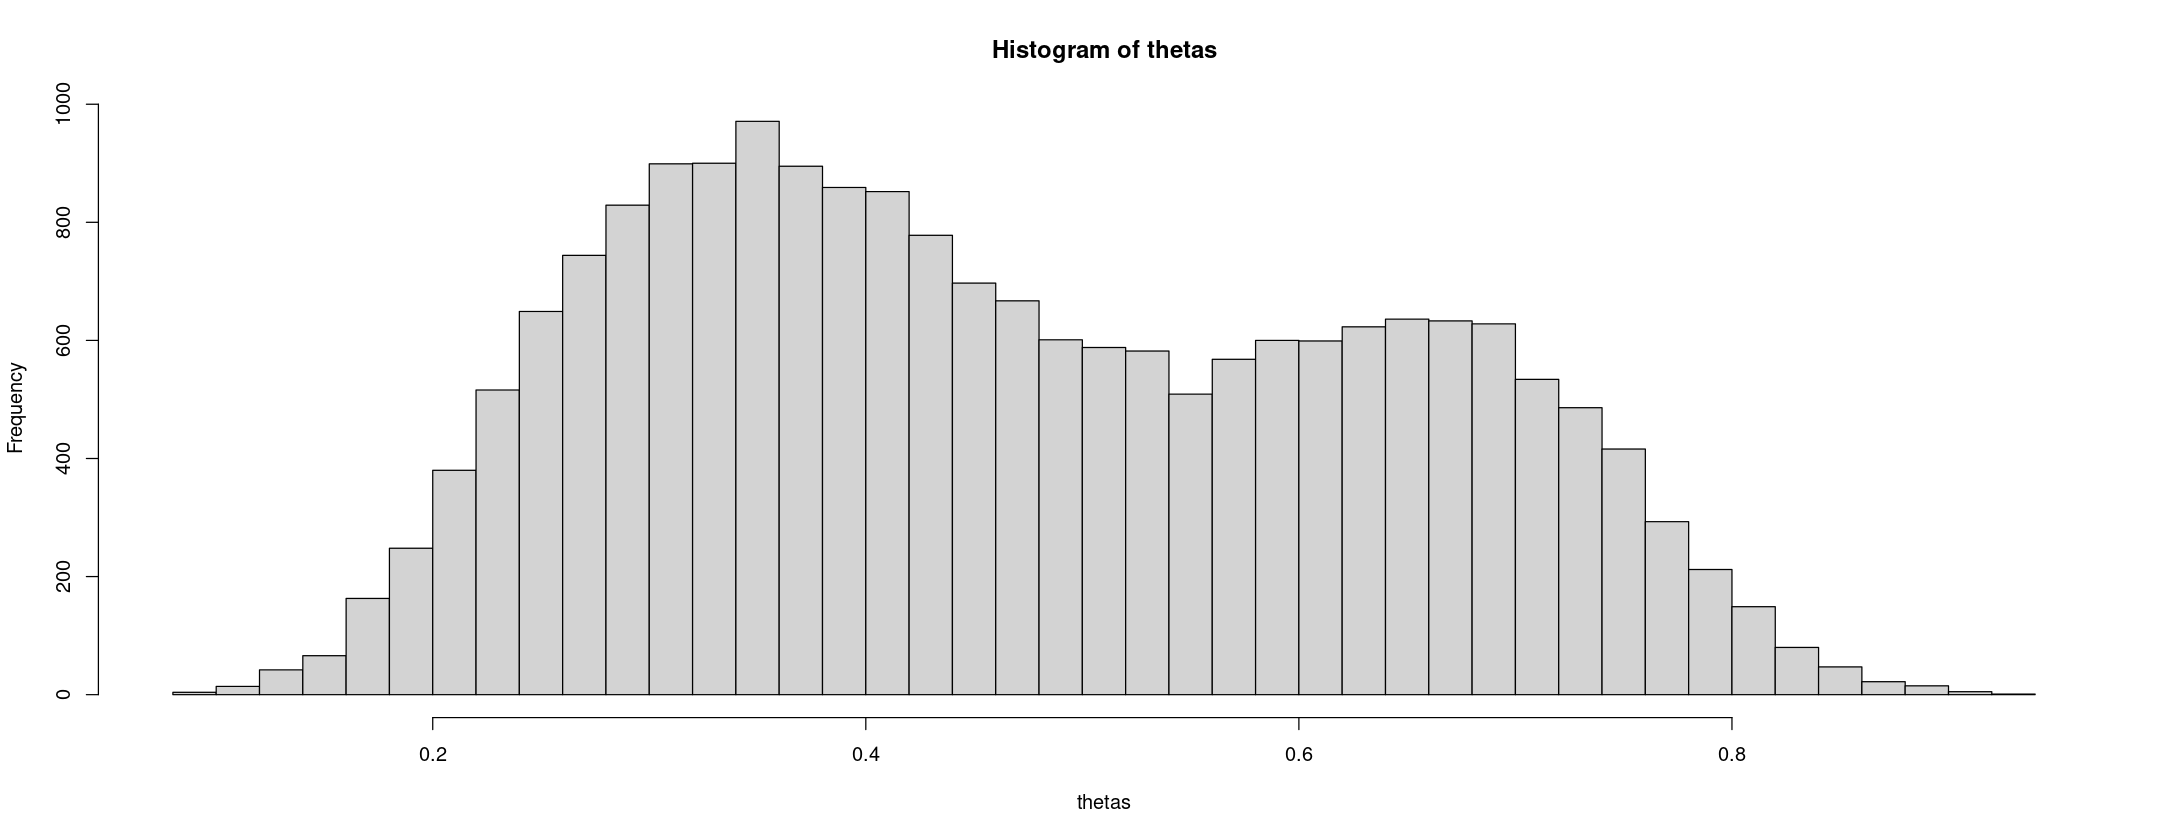

In [67]:
# Assign from which theta distribution we will pick each coin
source_beta <- sample(c(1,2,3), replace = TRUE, size = sample_size, prob=c(0.5, 0.2, 0.3))

# Generate thetas values picking coins from the corresponding beta distribution
thetas <- c(rbeta(sample_size,10,20)[source_beta == 1], 
            rbeta(sample_size,15,15)[source_beta == 2], 
            rbeta(sample_size,20,10)[source_beta == 3])

# Simulated prior
hist(thetas, breaks=50)

After this, each coin will be flipped `m` times coming from a binomial distribution and taking as probability the theta value assigned to each coin. The next cell outputs a table with the frequency of heads obtained and the prior predictive pmf for the simulation.

[1] "Absolute frequency of m heads:"


heads
   0    1    2    3    4    5    6    7    8    9   10 
 356 1142 2166 2852 3141 3042 2607 2170 1542  762  220 

[1] "Relative frequency of m heads:"


heads
      0       1       2       3       4       5       6       7       8       9 
0.01780 0.05710 0.10830 0.14260 0.15705 0.15210 0.13035 0.10850 0.07710 0.03810 
     10 
0.01100 

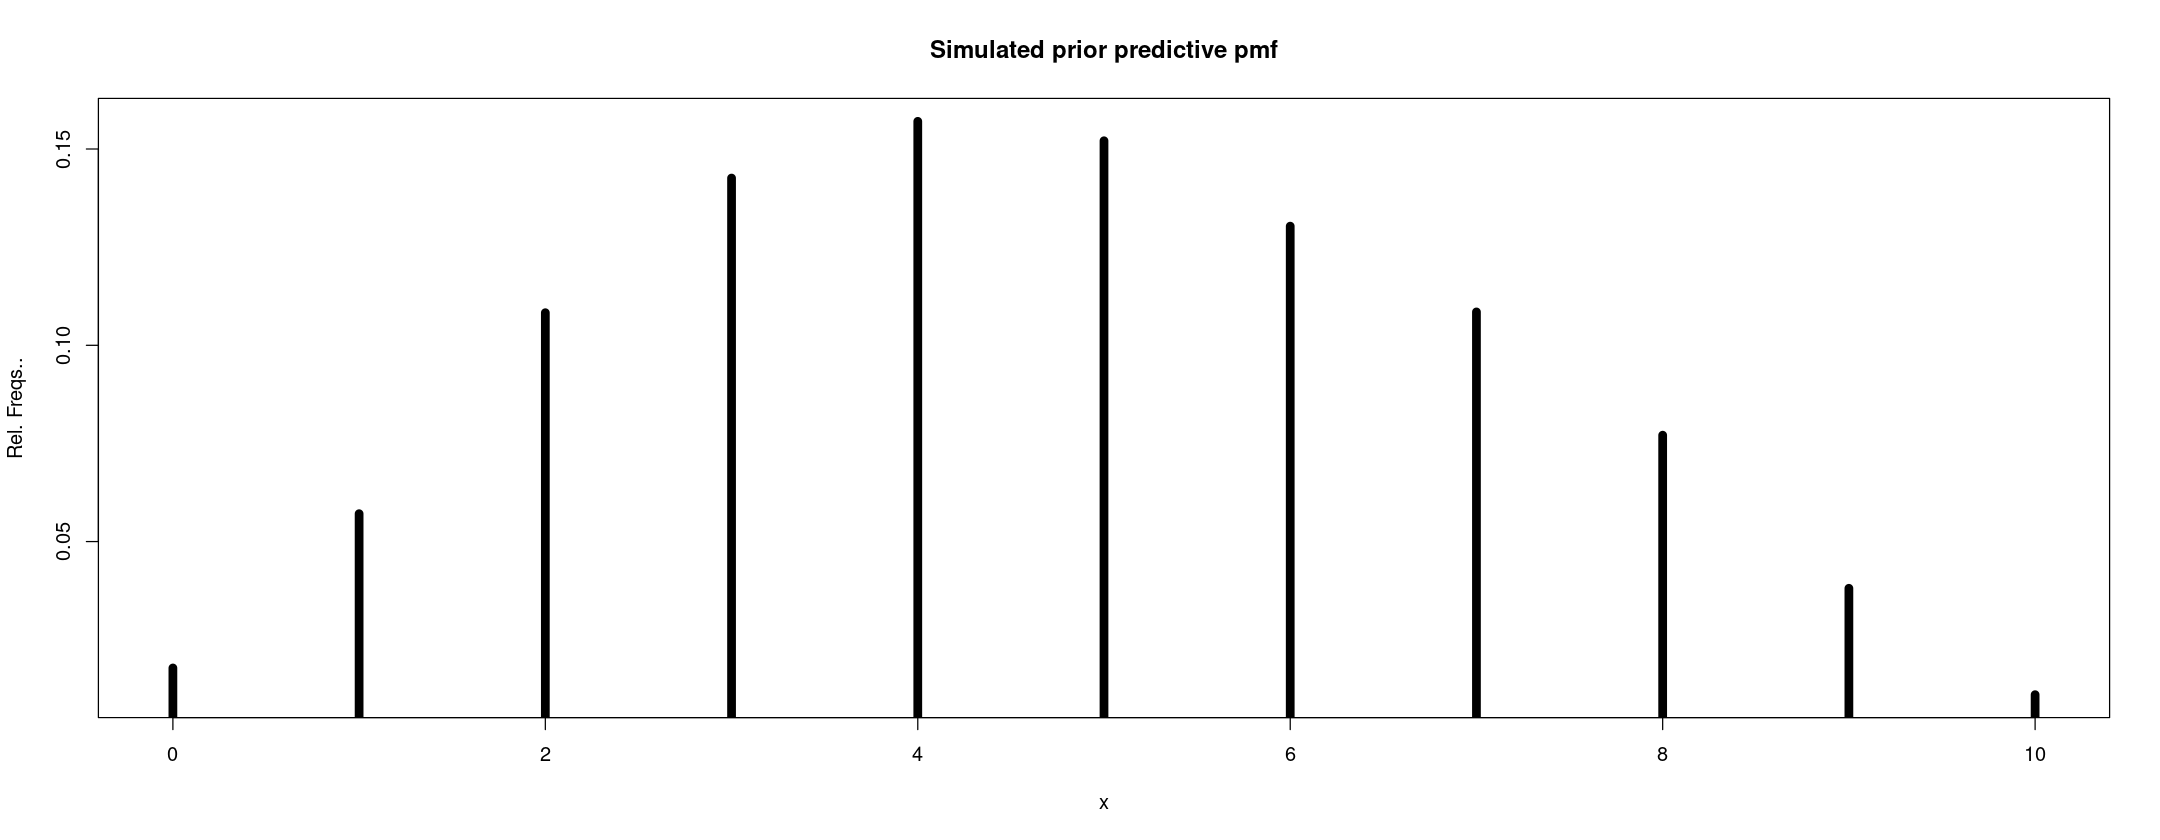

In [70]:
# Number of heads in m trials
heads <- rbinom(n = sample_size, size = n_throws, prob = thetas)

# Absolute frequencies
print("Absolute frequency of m heads:")
table(heads)
# Relative frequencies. 
# The relative frequency of 3 heads is the X-marginal for X=m=3.
# Obtaining m=3 heads is not the most likely outcome, based on this prior
print("Relative frequency of m heads:")
f <- table(heads)/sum(table(heads))
f
matplot(x=names(f),y=f,type="h",lwd=7, lty=1,
        xlab="x",ylab="Rel. Freqs..",
        main="Simulated prior predictive pmf")

Finally, with the aim to study the probability of having $m=3$ heads given theta, all cases resulting in $m=3$ heads are picked and the histogram of thetas producing `m` heads is plotted.

[1] "Proportion of samples with m=3 heads: 0.1426"


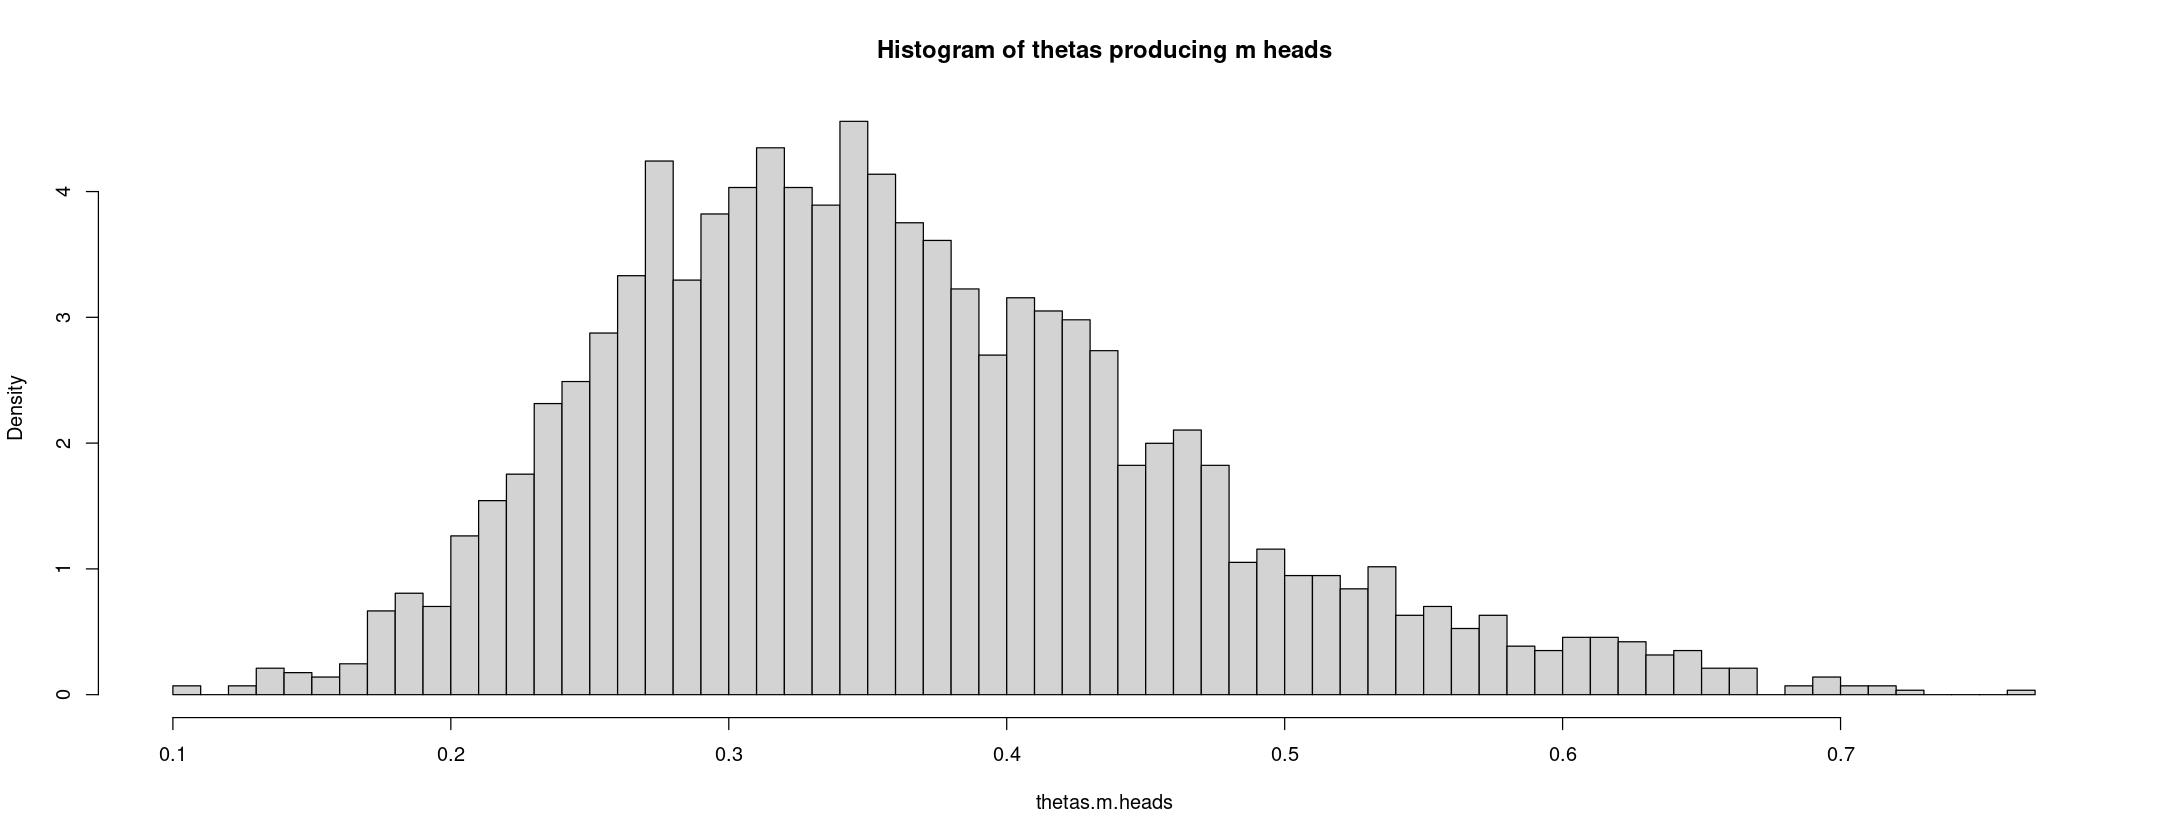

In [73]:
# Cases in which we get m=3 heads
m.heads.idx <- heads == m_heads

# Proportion of cases in which we get m=3 heads
print(paste0("Proportion of samples with m=3 heads: ", sum(m.heads.idx)/length(m.heads.idx)))

# Thetas that have generated m=3 heads
thetas.m.heads <- thetas[m.heads.idx]

# The histogram shows the theta values generating m=3 heads
hist(thetas.m.heads, breaks=50, freq=FALSE, main = "Histogram of thetas producing m heads")

Given this experiments, we can make the **analysis of the posterior quantities**.

### MAP estimator of $\theta$
Given the simulation performed before, we can estimate the MAP as the theta value with maximal density.

[1] "Simulated MAP: 0.33"


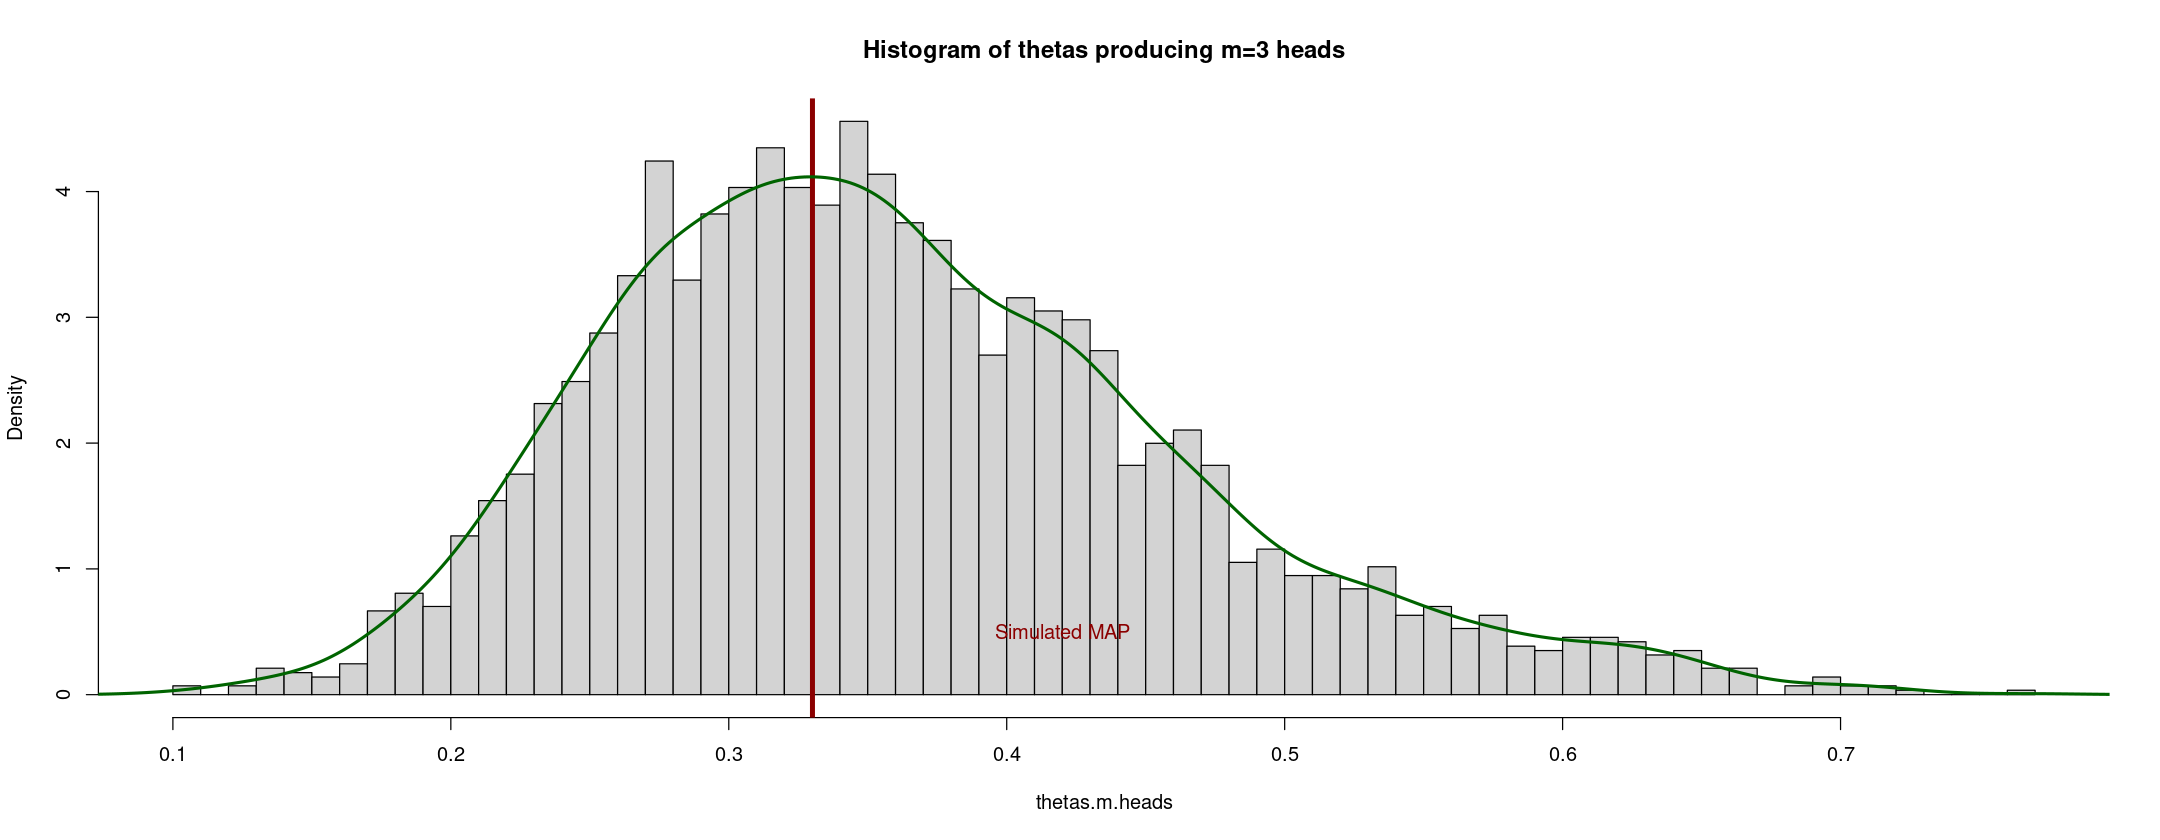

In [74]:
# Finding the maximum a posteriori (MAP)
# Finding MAP
thetas.m.heads.density <-density(thetas.m.heads)
Sim.MAP <- thetas.m.heads.density$x[which.max(thetas.m.heads.density$y)]

# Plot over histogram
hist(thetas.m.heads, breaks=50, freq=FALSE, main="Histogram of thetas producing m=3 heads")
abline(v=Sim.MAP,col="DarkRed",lwd=4)
lines(thetas.m.heads.density$x,thetas.m.heads.density$y,lwd=2.5,col="DarkGreen")
text(0.42, 0.5, "Simulated MAP", col="DarkRed")
print(paste0("Simulated MAP: ", round(Sim.MAP,3)))

### Posterior Expectation
Again, the simulation allows us to compute the posterior expectation as shown in the following cell.

In [75]:
# Simulated Expectation 
print(paste0("Simulation based posterior expectation: ",round(mean(thetas.m.heads),3)))

[1] "Simulation based posterior expectation: 0.361"


### Posterior Variance
And also the posterior variance as shown in the following cell.

In [76]:
# Simulated Variance
print(paste0("Simulation based posterior variance: ",round(var(thetas.m.heads),3)))

[1] "Simulation based posterior variance: 0.011"


---

Diaconis and Ylvisaker (1985) compare both mixture conjugate priors with a $ \operatorname{Unif}(0,1)$ prior with the data above. 

Comparing the MAP estimators, they observe that in a first approximation, they coincide, but spreads do depend on the prior.

They repeat the computations above with a larger sample. 

In [ ]:
n1<-50
x1.obs<-14

Their conclusion is that with small data, prior matters, but with larger samples, a finely tuned choice of prior is less important.

## (3) Using JAGS 


Now, we want to give the same analysis but using JAGS. JAGS is a model for simulation from Bayesian hierarchical models using Markov Chain Monte Carlo

To use JAGS, we need to install R2jags package correctly and then load it to our notebook

In [1]:
# Loading R2jags
require(R2jags)

Loading required package: R2jags

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




Then, we can load our data in a list to be used in our JAGS model

In [6]:
# List of parameters of our model, loaded before.
Mix.01.dat<-list(a1=prior.alpha1,b1=prior.beta1,a2=prior.alpha2,b2=prior.beta2,b3=prior.beta3,a3=prior.alpha3
                 ,gamma1=prior.gamma1,gamma2=prior.gamma2,gamma3=prior.gamma3,n=n,x=x.obs)

In [7]:
# JAGS model
cat(
"model
    {
    x~dbin(p,n)            
    p<-theta[r]
    r~dcat(g[])
    theta[1]~dbeta(a1,b1) 
    theta[2]~dbeta(a2,b2)
    theta[3]~dbeta(a3,b3)
    g[1]<-gamma1
    g[2]<-gamma2
    g[3]<-gamma3
    }"
    ,file="Mix.01.jag")

Now for the model, we use our mixture1 data and our JAGS model to perform some simulations. Following are default variables used in our JAGS model:
- number of chains = 4
- number of iterations = 3500
- number of burnin (iterations descarted at begining) = 500

In [8]:
Mix.01.m1<-jags(data=Mix.01.dat, n.chains=4,n.iter=3500,n.burnin=500, 
        parameters.to.save=c("theta","p"), model.file="Mix.01.jag")

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 4
   Total graph size: 17

Initializing model



In [9]:
print(Mix.01.m1)

Inference for Bugs model at "Mix.01.jag", fit using jags,
 4 chains, each with 3500 iterations (first 500 discarded), n.thin = 3
 n.sims = 4000 iterations saved
         mu.vect sd.vect  2.5%   25%   50%   75% 97.5%  Rhat n.eff
p          0.359   0.102 0.197 0.287 0.344 0.415 0.602 1.002  2400
theta[1]   0.326   0.075 0.188 0.274 0.323 0.374 0.481 1.001  4000
theta[2]   0.490   0.089 0.314 0.430 0.489 0.551 0.665 1.002  1600
theta[3]   0.662   0.087 0.482 0.604 0.666 0.723 0.822 1.001  4000
deviance   3.231   1.024 2.643 2.683 2.843 3.289 6.372 1.001  3800

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 0.5 and DIC = 3.8
DIC is an estimate of expected predictive error (lower deviance is better).


#### Traceplot to assess stationarity of the chains


Next, we can show the traceplot. Traceplot displays a plot of iterations vs. sampled values for each variable in the chain, with a separate plot per variable.

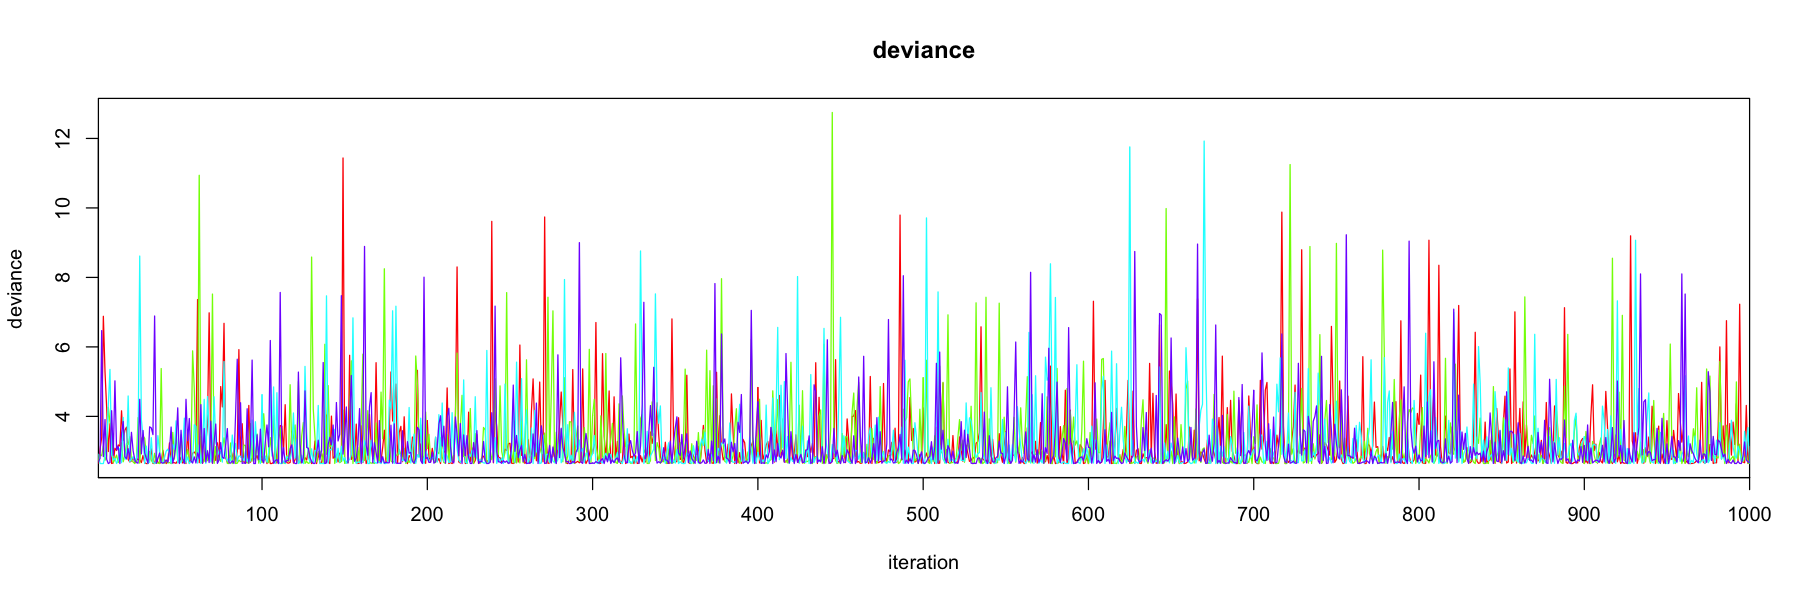

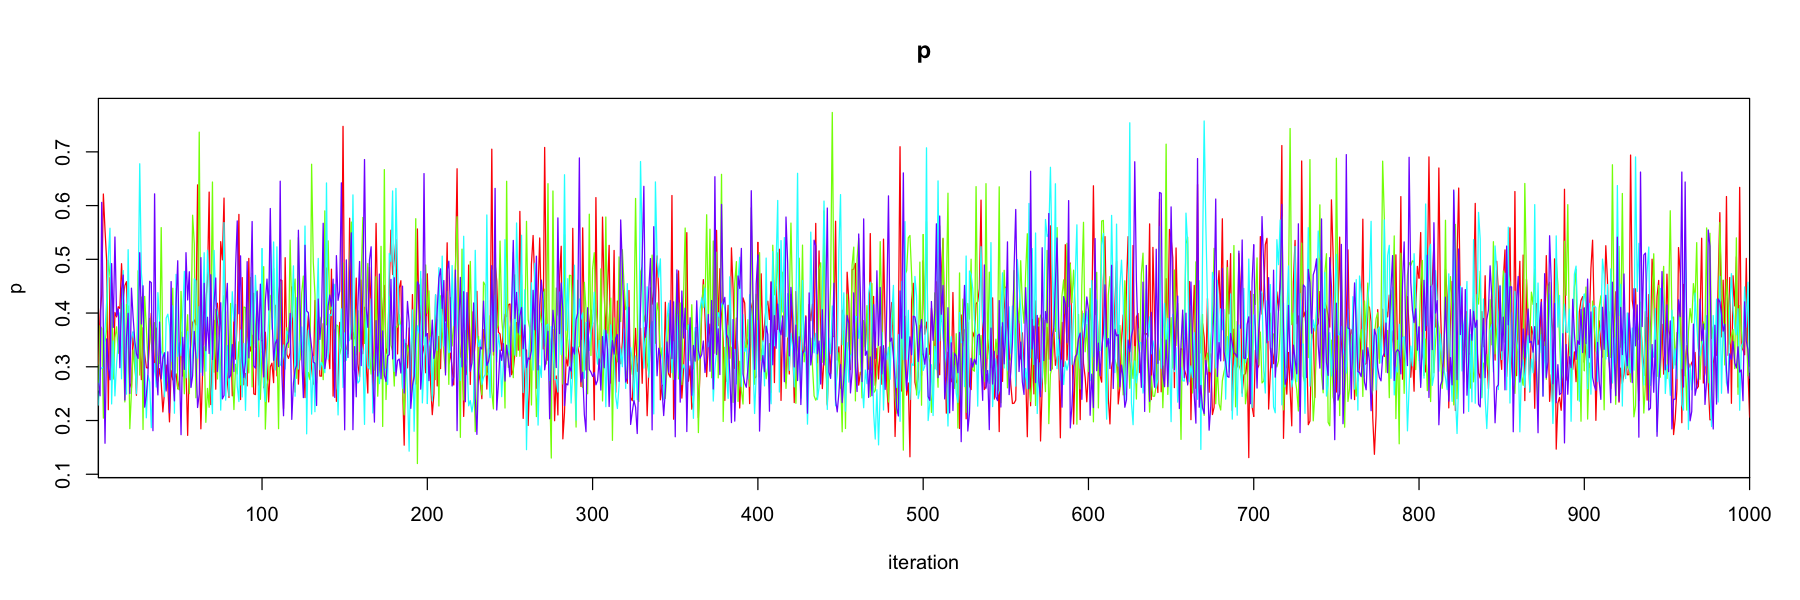

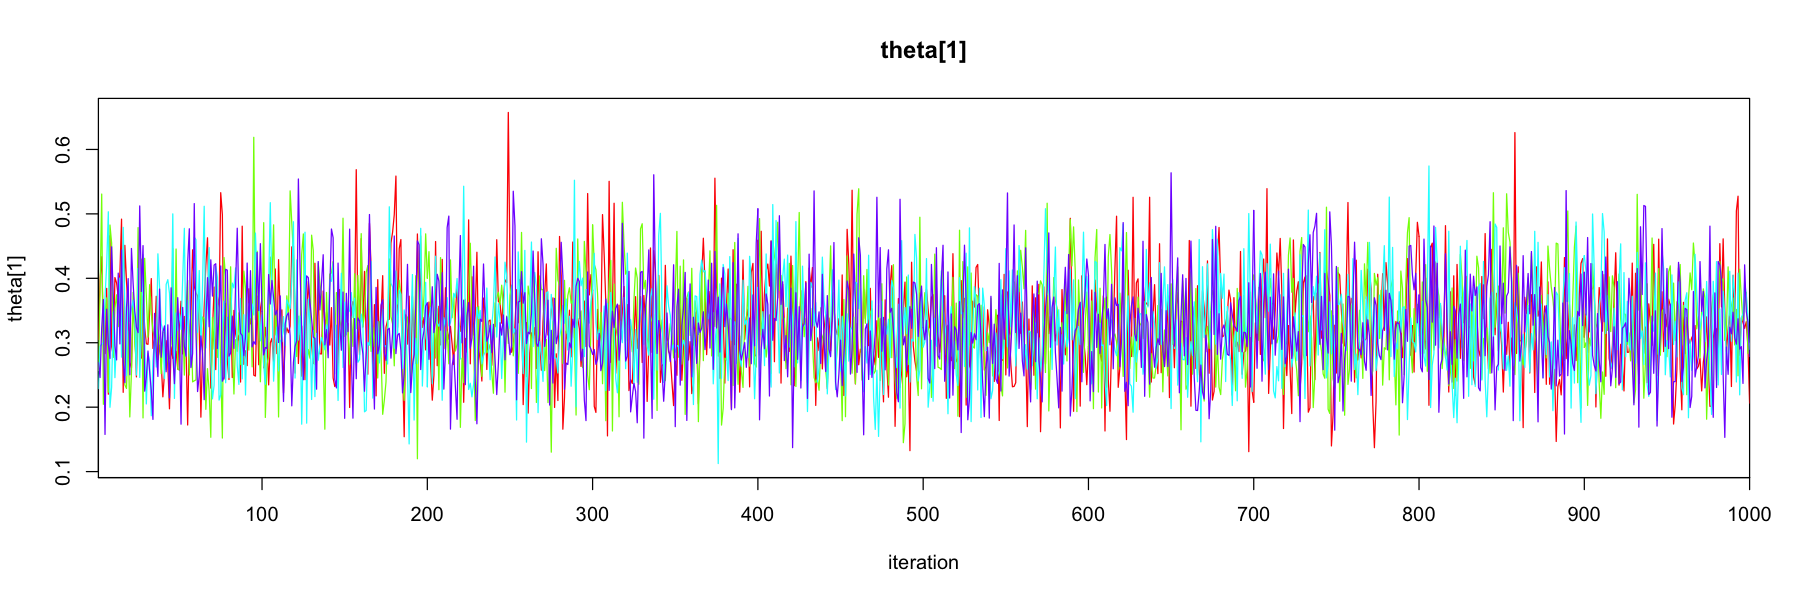

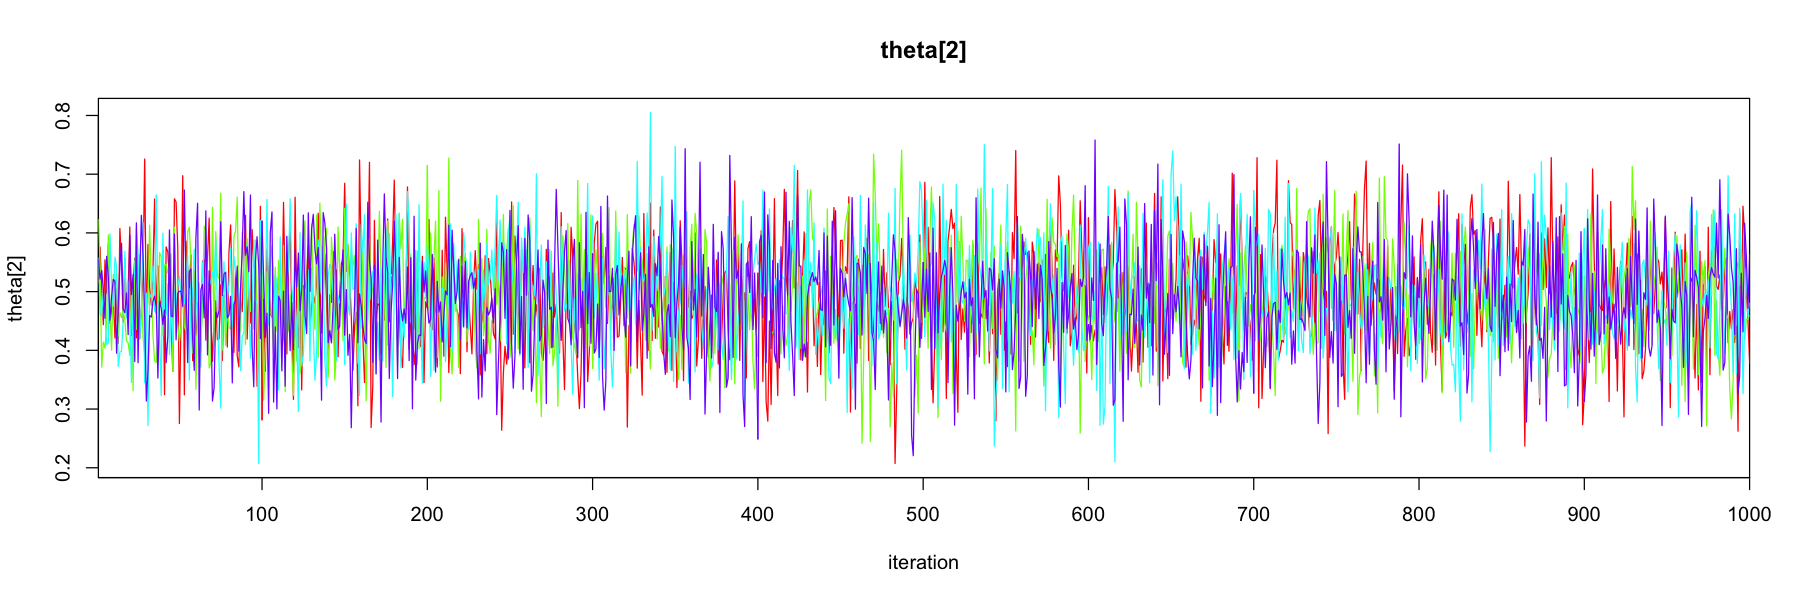

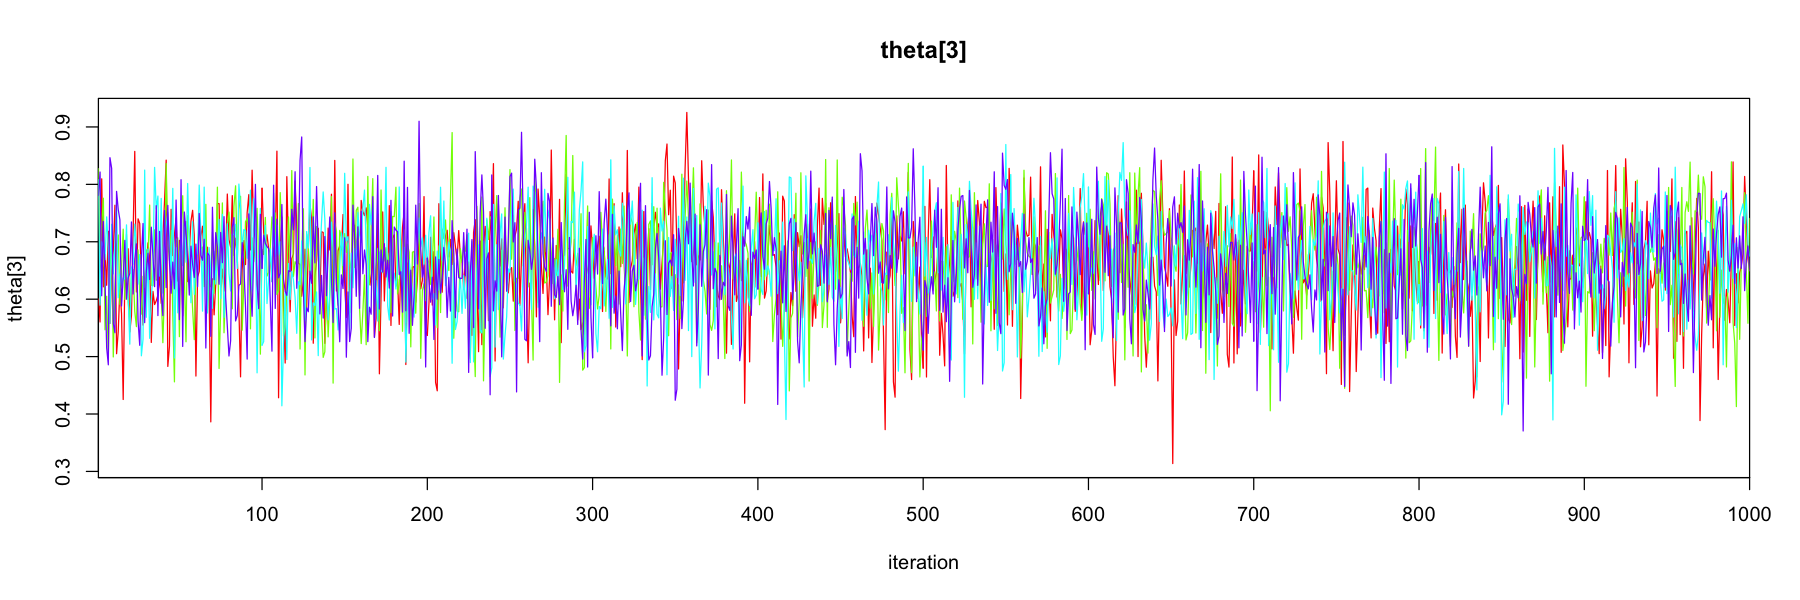

In [10]:
options(repr.plot.width=15,repr.plot.height=5)
traceplot(Mix.01.m1)

Finally, we can get a sample and plot the Estimated Posterior PDF of that sample

In [11]:
p.sample<-Mix.01.m1$BUGSoutput$sims.list$p

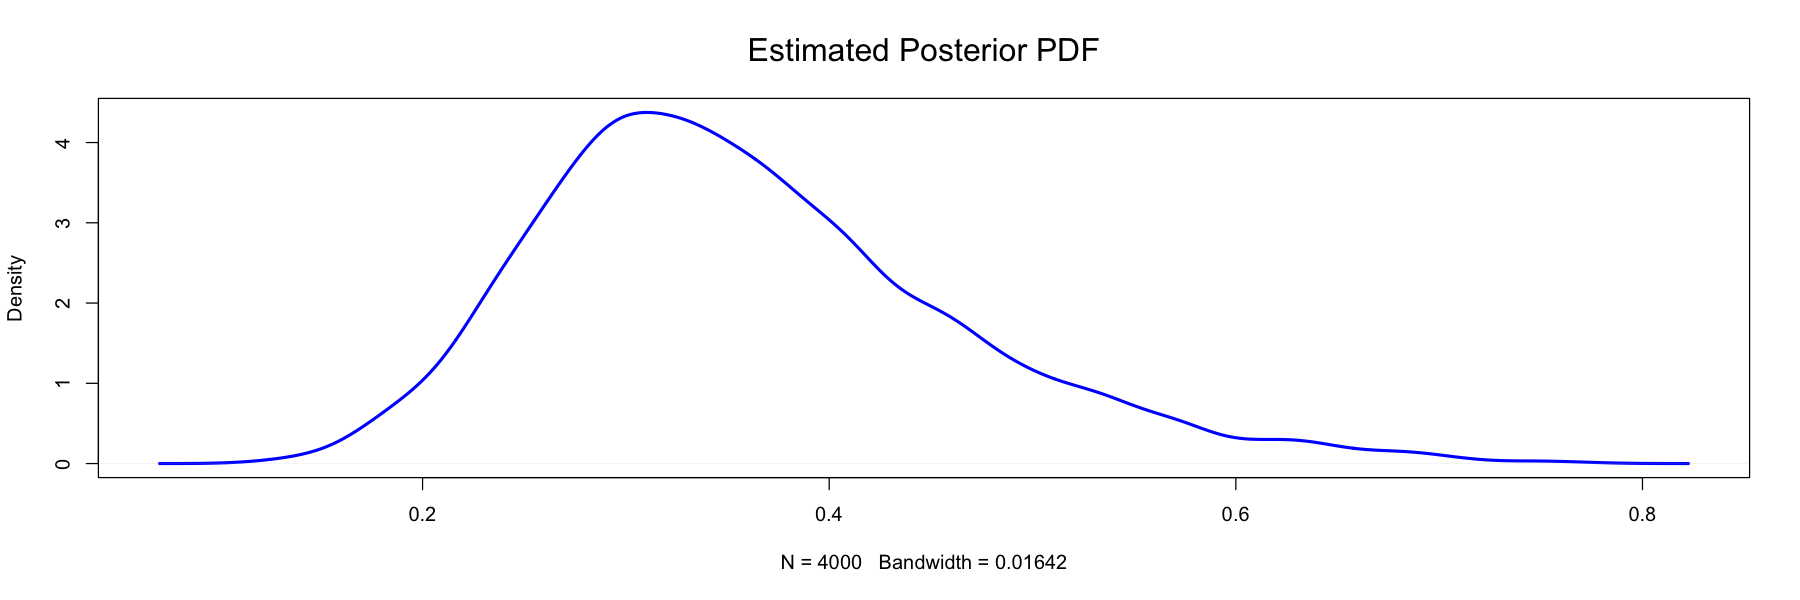

In [12]:
# Posterior PDF plot
p.sample.density<-density(p.sample)
plot(p.sample.density,lwd=2.5,col="blue",main=expression(paste("Estimated Posterior PDF")),cex.main=1.6)

Given this experiments, we can make the **analysis of the posterior quantities**.

### MAP estimator of $\theta$
Given the simulation performed before, we can estimate the MAP as the theta value with maximal density.

[1] "Simulated MAP: 0.311"


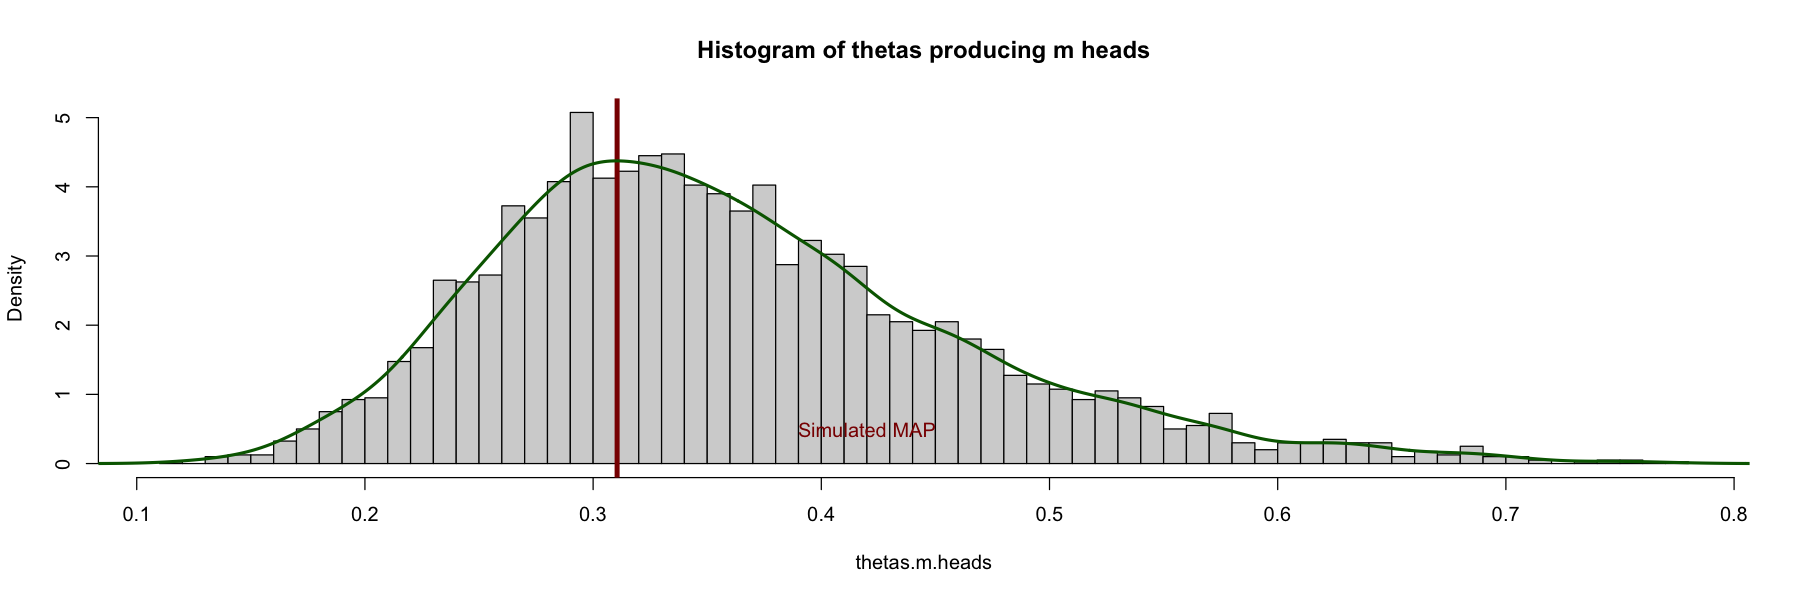

In [13]:
# Finding the maximum a posteriori (MAP)
# Finding MAP
thetas.m.heads<-p.sample
thetas.m.heads.density <-density(p.sample)
Sim.MAP <- thetas.m.heads.density$x[which.max(thetas.m.heads.density$y)]

# Plot over histogram
hist(thetas.m.heads, breaks=50, freq=FALSE, main="Histogram of thetas producing m heads")
abline(v=Sim.MAP,col="DarkRed",lwd=4)
lines(thetas.m.heads.density$x,thetas.m.heads.density$y,lwd=2.5,col="DarkGreen")
text(0.42, 0.5, "Simulated MAP", col="DarkRed")
print(paste0("Simulated MAP: ", round(Sim.MAP,3)))

### Posterior Expectation
Again, the simulation allows us to compute the posterior expectation as shown in the following cell.

In [14]:
# Simulated Expectation 
print(paste0("Simulation based posterior expectation: ",round(mean(thetas.m.heads),3)))

[1] "Simulation based posterior expectation: 0.359"


### Posterior Variance
And also the posterior variance as shown in the following cell.

In [15]:
# Simulated Variance
print(paste0("Simulation based posterior variance: ",round(var(thetas.m.heads),3)))

[1] "Simulation based posterior variance: 0.01"


## (3) Using STAN

In [16]:
# Loading rstan
require(rstan)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: 'rstan'


The following object is masked from 'package:R2jags':

    traceplot


The following object is masked from 'package:coda':

    traceplot




In [17]:
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Then, we can load our data in a list to be used in our STAN model

In [36]:
modelString = "
    data{
        int<lower=0> n ;
        int<lower=0> x ; 
        real<lower=0> a1 ;
        real<lower=0> b1 ;
        real<lower=0> a2 ;
        real<lower=0> b2 ;
        real<lower=0> a3 ;
        real<lower=0> b3 ;
        real<lower=0,upper=1>  gamma1 ;
        real<lower=0,upper=1>  gamma2 ;
        real<lower=0,upper=1>  gamma3 ;
        }
    parameters{
        real<lower=0,upper=1>  u ;
        vector<lower=0,upper=1>[2] theta ;
        }
    transformed parameters{                         
        real<lower=0,upper=1> p ;                   
                                                    // Here the trick:
                                                    // Generate on the spot the unnamed index selecting 
                                                    // which of both components in the mixture is chosen
        p=theta[u<gamma?1:2] ;
        }
    model{
        x ~ binomial(n,p) ;
        theta[1]~beta(a1,b1) ;
        theta[2]~beta(a2,b2) ;
        theta[3]~beta(a3,b3) ;
        u ~ uniform(0,1) ; 
        }"

In [37]:
# Translate model to C++ and compile to DSO:
stanDso <- stan_model( model_code=modelString ) 

SYNTAX ERROR, MESSAGE(S) FROM PARSER:

Variable "gamma" does not exist.

 error in 'model1716d59472602_e39f988e58cf352bffb716cd00395fbb' at line 24, column 23

  -------------------------------------------------

    22:                                                     // Generate on the spot the unnamed index selecting 

    23:                                                     // which of both components in the mixture is chosen

    24:         p=theta[u<gamma?1:2] ;

                              ^

    25:         }

  -------------------------------------------------





ERROR: Error in stanc(file = file, model_code = model_code, model_name = model_name, : failed to parse Stan model 'e39f988e58cf352bffb716cd00395fbb' due to the above error.


In [38]:
# List of parameters of our model, loaded before.
Mix.01.Standat<-list(a1=prior.alpha1,b1=prior.beta1,a2=prior.alpha2,b2=prior.beta2,b3=prior.beta3,a3=prior.alpha3
                 ,gamma1=prior.gamma1,gamma2=prior.gamma2,gamma3=prior.gamma3,n=n,x=x.obs)

In [39]:
# Generate posterior sample:
stanFit <- sampling( object=stanDso, 
                     data = Mix.01.Standat, 
                     chains = 3,
                     iter = 4000, 
                     warmup = 200, 
                     thin = 1)

Error in mod$fit_ptr() : 
  Exception: variable does not exist; processing stage=data initialization; variable name=gamma; base type=double  (in 'model1716d2a8536f8_647db2930804c3e15976479bf9dcafe7' at line 11)



failed to create the sampler; sampling not done



We could not find a workable version of Stan with three-components. The main problem is to figure out how to get the model working with three gammas instead of two gammas as seen from prior mixture in `Mixture.priors.02.ipynb`. More knowledge of rstan is needed to be able to succesfully build a workable version.